### 自動

In [1]:
import requests
import pandas as pd
import numpy as np
import warnings
import datetime
warnings.filterwarnings('ignore')
# ============上市股票df============
url = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=1&issuetype=1&industry_code=&Page=1&chklike=Y"
response = requests.get(url)
listed = pd.read_html(response.text)[0]
listed.columns = listed.iloc[0,:]
listed = listed[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]
listed = listed.iloc[1:]

# ============上櫃股票df============
urlTWO = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=2&issuetype=&industry_code=&Page=1&chklike=Y"
response = requests.get(urlTWO)
listedTWO = pd.read_html(response.text)[0]
listedTWO.columns = listedTWO.iloc[0,:]
listedTWO = listedTWO.loc[listedTWO['有價證券別'] == '股票']
listedTWO = listedTWO[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]

# ============上市股票代號+.TW============
stock_1 = listed["有價證券代號"]
stock_num = stock_1.apply(lambda x: str(x) + ".TW")
stock_num.loc[len(stock_num)+1] = '0050.TW'
stock_num.loc[len(stock_num)+1] = '^TWII'
# print(stock_num)

# ============上櫃股票代號+.TWO============
stock_2 = listedTWO["有價證券代號"]
stock_num2 = stock_2.apply(lambda x: str(x) + ".TWO")
# print(stock_num2)

# ============concate全部股票代號============
stock_num = pd.concat([stock_num, stock_num2], ignore_index=True)
# print(stock_num)
allstock_info = pd.concat([listed, listedTWO], ignore_index=True)
allstock_info.columns = ["ID","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]
allstock_info.set_index('ID', inplace = True)
print(allstock_info)


     有價證券名稱 市場別    產業別 公開發行/上市(櫃)/發行日
ID                                   
1101     台泥  上市   水泥工業     1962/02/09
1102     亞泥  上市   水泥工業     1962/06/08
1103     嘉泥  上市   水泥工業     1969/11/14
1104     環泥  上市   水泥工業     1971/02/01
1108     幸福  上市   水泥工業     1990/06/06
...     ...  ..    ...            ...
9949     琉園  上櫃  文化創意業     2003/11/21
9950    萬國通  上櫃   塑膠工業     2004/02/17
9951     皇田  上櫃   電機機械     2003/12/18
9960    邁達康  上櫃   運動休閒     2004/12/06
9962     有益  上櫃   鋼鐵工業     2006/07/10

[1855 rows x 4 columns]


In [ ]:
time_range_list = [['2023-10-31', '2023-11-10'], ['2023-11-14', '2023-11-24'], ['2023-11-27', '2023-12-04'], 
                   ['2023-12-21', '2024-01-02'], ['2024-01-05', '2024-01-17'], ['2024-01-18', '2024-02-22'], 
                   ['2024-02-29', '2024-03-06'], ['2024-03-26', '2024-04-09'], ['2024-04-23', '2024-05-09'], 
                   ['2024-05-14', '2024-05-31'], ['2024-06-11', '2024-06-21'], ['2024-06-27', '2024-07-09'], 
                   ['2024-07-29', '2024-08-02'], ['2024-08-06', '2024-08-28'], ['2024-09-11', '2024-09-30'], 
                   ['2024-10-16', '2024-10-24'], ['2024-11-04', '2024-11-12'], ['2024-11-18', '2024-11-27'], 
                   ['2024-11-28', '2024-12-09'], ['2024-03-15', '2024-04-09'], ['2024-08-13', '2024-08-26'],
                   ['2025-01-03', '2025-01-09'], ['2025-01-15', '2025-01-22'], ['2024-08-06', '2024-08-28']]

In [ ]:
time_range = time_range_list[-2]
start_time = time_range[0]
end_time = time_range[1]
bias_range = 3

In [ ]:
import pandas as pd
path = fr'C:\Users\User\Desktop\stock\全個股條件篩選\daily_stock_summary_{start_time}_with_template.xlsx'
df_origin = pd.read_excel(path)
df = df_origin.loc[df_origin['ERS_rate_20'] > 80]
df = df.loc[df['ERS_rate_50'] > 80]
df = df.loc[df['ERS_rate_250'] > 80]


df = df.loc[df['year high sort'] == True]
df = df.loc[df['year low sort'] == True]
df = df.loc[df['Volume 50MA>250k'] == True]
df = df.loc[df['business volume(億)'] > 3]

# df = df.loc[df['STD_7'] > 3]
# df = df.loc[df['STD_7'] < df['STD_7_7MA']]
# df['volume decrease'] = df['Volume'] < df['Volume_5MA']

# df['5MA_bias'] = abs(df['Adj Close'] / df['5MA'] - 1)*100
# df['10MA_bias'] = abs(df['Adj Close'] / df['10MA'] - 1)*100
# df['20MA_bias'] = abs(df['Adj Close'] / df['20MA'] - 1)*100
# df = df.loc[df['5MA_bias'] < bias_range]
# df = df.loc[df['10MA_bias'] < bias_range]
# df = df.loc[df['20MA_bias'] < 10]

# df['bigger_than_20MA'] = df['Adj Close']*0.97 > df['20MA']
# df = df.loc[df['bigger_than_20MA'] == True]




IDs = df['ID'].values
sort_ID = list(map(lambda x:x.split('.')[0],df['ID'].values))
print(sort_ID)
text = ''
for id in sort_ID:
    id = str(id)
    if allstock_info.loc[id, '市場別'] == '上櫃':
        text += f'TPEX:{id}\n'
    elif allstock_info.loc[id, '市場別'] == '上市':
        text += f'TWSE:{id}\n'
    # create and save to txt
print(len(sort_ID))
with open(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/tradingview觀察清單/{start_time}_Rebound Elite.txt', 'w', encoding='utf-8') as f:
    f.write(text)
print(f'{start_time}_Rebound Elite.txt saved')


In [ ]:
stock_data_path = fr'C:\Users\User\Desktop\stock\data_test'
win_times = 0
lose_times = 0
win_profits = []
lose_profits = []
max_profits = []
min_profits = []
spend_trade_days_list = [] 
for ID in IDs:
    stock_df = pd.read_csv(f'{stock_data_path}/{ID}.csv')
    stock_df = stock_df.loc[stock_df['Date'] > start_time]
    stock_df = stock_df.loc[stock_df['Date'] <= end_time]
    stock_df['Adj High'] = stock_df['Adj Close']/stock_df['Close']*stock_df['High']
    stock_df['Adj Low'] = stock_df['Adj Close']/stock_df['Close']*stock_df['Low']
    if stock_df.empty:
        continue
    trade_days = len(stock_df)
    stock_df.reset_index(drop=True, inplace=True)
    # max and min price and index of price drop bigger than 3.5% 
    # max_price = stock_df.loc[1:, 'Adj Close'].max()
    # min_price = stock_df['Adj Close'].min()
    buy_price = stock_df.loc[0, 'Adj Close']
    rolling_profit_rate = round((stock_df.loc[1:, 'Adj Close'] - buy_price)*100 / buy_price, 2)
    rolling_max_profit_rate = round((stock_df.loc[1:, 'Adj High'] - buy_price)*100 / buy_price, 2)
    rolling_min_profit_rate = round((stock_df.loc[1:, 'Adj Low'] - buy_price)*100 / buy_price, 2)
    max_max_profit_rate = rolling_max_profit_rate.max()
    min_min_profit_rate = rolling_min_profit_rate.min()
    max_profit_rate = rolling_profit_rate.max()
    min_profit_rate = rolling_profit_rate.min()
    ## index list of profit rate > 10% and < -3% 
    take_profit_index = rolling_max_profit_rate[rolling_max_profit_rate > 10].index
    max_profits.append(max_max_profit_rate)
    stop_loss_index = rolling_min_profit_rate[rolling_min_profit_rate < -3.5].index
    min_profits.append(min_min_profit_rate)
    if take_profit_index.empty:
        take_profit_index = stock_df.index[-1]
    else:
        take_profit_index = take_profit_index[0]
    if stop_loss_index.empty:
        stop_loss_index = stock_df.index[-1]
    else:
        stop_loss_index = stop_loss_index[0]
    take_profit_date = stock_df.loc[take_profit_index, 'Date']
    stop_loss_date = stock_df.loc[stop_loss_index, 'Date']

    if take_profit_index < stop_loss_index:
        profit = rolling_max_profit_rate.loc[take_profit_index]
        profit_date = take_profit_date
        win_or_lose = 'win'
    elif take_profit_index > stop_loss_index:
        profit = rolling_min_profit_rate.loc[stop_loss_index]
        profit_date = stop_loss_date
        win_or_lose = 'lose'
    else:
        profit = rolling_profit_rate.loc[stop_loss_index]
        profit_date = stop_loss_date
        win_or_lose = 'lose' if profit < 0 else 'win'
    if win_or_lose == 'win':
        win_times += 1
        win_profits.append(profit)
    else:
        lose_times += 1
        lose_profits.append(profit)
    spend_trade_days = datetime.datetime.strptime(profit_date, '%Y-%m-%d') - datetime.datetime.strptime(start_time, '%Y-%m-%d')
    spend_trade_days_list.append(spend_trade_days.days)
    print(f'{win_or_lose} | {ID} | max : {max_max_profit_rate}% | min : {min_min_profit_rate}% | profit: {profit}% | take profit date: {profit_date} | spend days: {spend_trade_days.days} | buy date: {stock_df.loc[0, "Date"]}')

win_rate = round(win_times/(win_times+lose_times), 4)

capital = 500000
max_profit_multi = 4
min_profit_multi = 1.2
win_profits = list(map(lambda x: 12 if x > 12 else x, win_profits))
lose_profits = list(map(lambda x: -5 if x < -5 else x, lose_profits))
total_profit = sum(win_profits) + sum(lose_profits)
trade_times = win_times + lose_times
avg_profit = round((total_profit/100) / trade_times, 3)
avg_max_profit = round(sum(max_profits)/len(max_profits), 2)
avg_min_profit = round(sum(min_profits)/len(min_profits), 2)


In [ ]:
print(f'start time: {start_time} | end time: {end_time} | trade days: {trade_days} | avg trade days: {round(np.mean(spend_trade_days_list), 1)} | trade times: {trade_times}')
print(f'win times: {win_times} | lose times: {lose_times} | win rate: {win_rate*100}% | avg profit: {avg_profit*100}% | avg max profit: {avg_max_profit}% | avg min profit: {avg_min_profit}%')
print(f'avg win profits: {round(np.mean(win_profits), 2)}% | avg lose profits: {round(np.mean(lose_profits), 2)}% | win/lose ratio: {abs(round(np.mean(win_profits)/np.mean(lose_profits), 2))} | adj win/lose ratio: {abs((np.mean(win_profits)*win_rate)/(np.mean(lose_profits)*(1-win_rate)))}')
print(f'capital: {capital} | max profit(4X) : {capital*(1+max_profit_multi*avg_profit)}({(100*max_profit_multi*avg_profit)}%) | min profit(1.2X) : {capital*(min_profit_multi*avg_profit)}({(100*min_profit_multi*avg_profit)}%)')

### 近1年回測

In [3]:
back_test_df = pd.DataFrame([], columns=['start_time', 'end_time', 'trade_days', 'avg_trade_days', 'trade_times', 'win_times', 'lose_times', 'win_rate', 'avg_profit', 'avg_max_profit', 'avg_min_profit', 'avg_win_profits', 'avg_lose_profits', 'win_lose_ratio', 'adj_win_lose_ratio', 'capital', 'max_profit', 'min_profit'])

# time_range_list = [['2023-10-31', '2023-11-10'], ['2023-11-14', '2023-11-24'], ['2023-11-27', '2023-12-04'], 
#                    ['2023-12-21', '2024-01-02'], ['2024-01-05', '2024-01-17'], ['2024-01-18', '2024-02-22'], 
#                    ['2024-02-29', '2024-03-06'], ['2024-03-15', '2024-04-09'], ['2024-04-23', '2024-05-09'], 
#                    ['2024-05-14', '2024-05-31'], ['2024-06-11', '2024-06-21'], ['2024-06-27', '2024-07-09'], 
#                    ['2024-07-29', '2024-08-02'], ['2024-08-06', '2024-08-28'], ['2024-09-11', '2024-09-30'], 
#                    ['2024-10-16', '2024-10-24'], ['2024-11-04', '2024-11-12'], ['2024-11-18', '2024-11-27'], 
#                    ['2024-11-28', '2024-12-09'], ]
time_range_list = [['2023-11-01', '2023-11-10'], ['2023-11-15', '2023-11-24'], ['2023-11-28', '2023-12-04'], 
                   ['2023-12-22', '2024-01-02'], ['2024-01-08', '2024-01-17'], ['2024-01-19', '2024-02-22'], 
                   ['2024-03-01', '2024-03-06'], ['2024-03-18', '2024-04-09'], ['2024-04-24', '2024-05-09'], 
                   ['2024-05-15', '2024-05-31'], ['2024-06-12', '2024-06-21'], ['2024-07-01', '2024-07-09'], 
                   ['2024-07-30', '2024-08-02'], ['2024-08-07', '2024-08-28'], ['2024-09-12', '2024-09-30'], 
                   ['2024-10-17', '2024-10-24'], ['2024-11-07', '2024-11-12'], ['2024-11-21', '2024-11-27'], 
                   ['2024-11-29', '2024-12-09'], ]
for time_range in time_range_list:
    start_time = time_range[0]
    end_time = time_range[1]
    bias_range = 3
    path = fr'C:\Users\User\Desktop\stock\全個股條件篩選\daily_stock_summary_{start_time}_with_template.xlsx'
    df_origin = pd.read_excel(path)
    df = df_origin.loc[df_origin['ERS_rate_20'] > 80]
    df = df.loc[df['ERS_rate_50'] > 80]
    df = df.loc[df['ERS_rate_250'] > 80]
    df = df.loc[df['year high sort'] == True]
    df = df.loc[df['year low sort'] == True]
    df = df.loc[df['Volume 50MA>250k'] == True]
    df = df.loc[df['business volume(億)'] > 3]

    # df = df.loc[df['STD_7'] > 3]
    # df = df.loc[df['STD_7'] < df['STD_7_7MA']]
    # df['volume decrease'] = df['Volume'] < df['Volume_5MA']

    # df['5MA_bias'] = abs(df['Adj Close'] / df['5MA'] - 1)*100
    # df['10MA_bias'] = abs(df['Adj Close'] / df['10MA'] - 1)*100
    # df['20MA_bias'] = abs(df['Adj Close'] / df['20MA'] - 1)*100
    # df = df.loc[df['5MA_bias'] < bias_range]
    # df = df.loc[df['10MA_bias'] < bias_range]
    # df = df.loc[df['20MA_bias'] < 10]

    # df['bigger_than_20MA'] = df['Adj Close']*0.97 > df['20MA']
    # df = df.loc[df['bigger_than_20MA'] == True]




    IDs = df['ID'].values
    sort_ID = list(map(lambda x:x.split('.')[0],df['ID'].values))
    print(sort_ID)
    text = ''
    for id in sort_ID:
        id = str(id)
        if allstock_info.loc[id, '市場別'] == '上櫃':
            text += f'TPEX:{id}\n'
        elif allstock_info.loc[id, '市場別'] == '上市':
            text += f'TWSE:{id}\n'
        # create and save to txt
    print(len(sort_ID))
    with open(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/tradingview觀察清單/{start_time}_Rebound Elite.txt', 'w', encoding='utf-8') as f:
        f.write(text)
    print(f'{start_time}_Rebound Elite.txt saved')


    stock_data_path = fr'C:\Users\User\Desktop\stock\data_test'
    win_times = 0
    lose_times = 0
    win_profits = []
    lose_profits = []
    max_profits = []
    min_profits = []
    spend_trade_days_list = [] 
    for ID in IDs:
        stock_df = pd.read_csv(f'{stock_data_path}/{ID}.csv')
        stock_df = stock_df.loc[stock_df['Date'] > start_time]
        stock_df = stock_df.loc[stock_df['Date'] <= end_time]
        stock_df['Adj High'] = stock_df['Adj Close']/stock_df['Close']*stock_df['High']
        stock_df['Adj Low'] = stock_df['Adj Close']/stock_df['Close']*stock_df['Low']
        if stock_df.empty:
            continue
        trade_days = len(stock_df)
        stock_df.reset_index(drop=True, inplace=True)
        # max and min price and index of price drop bigger than 3.5% 
        # max_price = stock_df.loc[1:, 'Adj Close'].max()
        # min_price = stock_df['Adj Close'].min()
        buy_price = stock_df.loc[0, 'Adj Close']
        rolling_profit_rate = round((stock_df.loc[1:, 'Adj Close'] - buy_price)*100 / buy_price, 2)
        rolling_max_profit_rate = round((stock_df.loc[1:, 'Adj High'] - buy_price)*100 / buy_price, 2)
        rolling_min_profit_rate = round((stock_df.loc[1:, 'Adj Low'] - buy_price)*100 / buy_price, 2)
        max_max_profit_rate = rolling_max_profit_rate.max()
        min_min_profit_rate = rolling_min_profit_rate.min()
        max_profit_rate = rolling_profit_rate.max()
        min_profit_rate = rolling_profit_rate.min()
        ## index list of profit rate > 10% and < -3% 
        take_profit_index = rolling_max_profit_rate[rolling_max_profit_rate > 10].index
        max_profits.append(max_max_profit_rate)
        stop_loss_index = rolling_min_profit_rate[rolling_min_profit_rate < -3.5].index
        min_profits.append(min_min_profit_rate)
        if take_profit_index.empty:
            take_profit_index = stock_df.index[-1]
        else:
            take_profit_index = take_profit_index[0]
        if stop_loss_index.empty:
            stop_loss_index = stock_df.index[-1]
        else:
            stop_loss_index = stop_loss_index[0]
        take_profit_date = stock_df.loc[take_profit_index, 'Date']
        stop_loss_date = stock_df.loc[stop_loss_index, 'Date']

        if take_profit_index < stop_loss_index:
            profit = rolling_max_profit_rate.loc[take_profit_index]
            profit_date = take_profit_date
            win_or_lose = 'win'
        elif take_profit_index > stop_loss_index:
            profit = rolling_min_profit_rate.loc[stop_loss_index]
            profit_date = stop_loss_date
            win_or_lose = 'lose'
        else:
            profit = rolling_profit_rate.loc[stop_loss_index]
            profit_date = stop_loss_date
            win_or_lose = 'lose' if profit < 0 else 'win'
        if win_or_lose == 'win':
            win_times += 1
            win_profits.append(profit)
        else:
            lose_times += 1
            lose_profits.append(profit)
        spend_trade_days = datetime.datetime.strptime(profit_date, '%Y-%m-%d') - datetime.datetime.strptime(start_time, '%Y-%m-%d')
        spend_trade_days_list.append(spend_trade_days.days)
        # print(f'{win_or_lose} | {ID} | max : {max_max_profit_rate}% | min : {min_min_profit_rate}% | profit: {profit}% | take profit date: {profit_date} | spend days: {spend_trade_days.days} | buy date: {stock_df.loc[0, "Date"]}')

    win_rate = round(win_times/(win_times+lose_times), 4)
    capital = 500000
    max_profit_multi = 4
    min_profit_multi = 1.2
    win_profits = list(map(lambda x: 12 if x > 12 else x, win_profits))
    lose_profits = list(map(lambda x: -5 if x < -5 else x, lose_profits))
    total_profit = sum(win_profits) + sum(lose_profits)
    trade_times = win_times + lose_times
    avg_profit = round((total_profit/100) / trade_times, 3)
    avg_max_profit = round(sum(max_profits)/len(max_profits), 2)
    avg_min_profit = round(sum(min_profits)/len(min_profits), 2)

    print(f'start time: {start_time} | end time: {end_time} | trade days: {trade_days} | avg trade days: {round(np.mean(spend_trade_days_list), 1)} | trade times: {trade_times}')
    print(f'win times: {win_times} | lose times: {lose_times} | win rate: {win_rate*100}% | avg profit: {avg_profit*100}% | avg max profit: {avg_max_profit}% | avg min profit: {avg_min_profit}%')
    print(f'avg win profits: {round(np.mean(win_profits), 2)}% | avg lose profits: {round(np.mean(lose_profits), 2)}% | win/lose ratio: {abs(round(np.mean(win_profits)/np.mean(lose_profits), 2))} | adj win/lose ratio: {abs((np.mean(win_profits)*win_rate)/(np.mean(lose_profits)*(1-win_rate)))}')
    print(f'capital: {capital} | max profit(4X) : {capital*(1+max_profit_multi*avg_profit)}({(100*max_profit_multi*avg_profit)}%) | min profit(1.2X) : {capital*(min_profit_multi*avg_profit)}({(100*min_profit_multi*avg_profit)}%)')

    back_test_df = back_test_df.append({'start_time': start_time, 
                                        'end_time': end_time, 
                                        'trade_days': trade_days, 
                                        'avg_trade_days': round(np.mean(spend_trade_days_list), 1), 
                                        'trade_times': trade_times, 
                                        'win_times': win_times, 
                                        'lose_times': lose_times, 
                                        'win_rate': win_rate, 
                                        'avg_profit': avg_profit, 
                                        'avg_max_profit': avg_max_profit, 
                                        'avg_min_profit': avg_min_profit, 
                                        'avg_win_profits': round(np.mean(win_profits), 2), 
                                        'avg_lose_profits': round(np.mean(lose_profits), 2), 
                                        'win_lose_ratio': abs(round(np.mean(win_profits)/np.mean(lose_profits), 2)), 
                                        'adj_win_lose_ratio': abs((np.mean(win_profits)*win_rate)/(np.mean(lose_profits)*(1-win_rate))), 
                                        'capital': capital, 
                                        'max_profit': capital*(max_profit_multi*avg_profit), 
                                        'min_profit': capital*(min_profit_multi*avg_profit)}, 
                                        ignore_index=True)


['8936', '8112', '8086', '8054', '8016', '6732', '6679', '6492', '6442', '6284', '6197', '6191', '6150', '6139', '5289', '5269', '5258', '4979', '4967', '4961', '4908', '4162', '3715', '3704', '3702', '3661', '3548', '3450', '3322', '3293', '3122', '3036', '3034', '2492', '2454', '2417', '2388', '2363', '1815', '1560', '1524', '1477']
42
2023-11-01_Rebound Elite.txt saved
start time: 2023-11-01 | end time: 2023-11-10 | trade days: 7 | avg trade days: 6.0 | trade times: 42
win times: 13 | lose times: 29 | win rate: 30.95% | avg profit: -0.1% | avg max profit: 7.2% | avg min profit: -5.2%
avg win profits: 8.43% | avg lose profits: -3.93% | win/lose ratio: 2.14 | adj win/lose ratio: 0.96018056478975
capital: 500000 | max profit(4X) : 498000.0(-0.4%) | min profit(1.2X) : -600.0(-0.12%)
['8936', '8210', '8088', '8086', '8054', '6806', '6732', '6691', '6669', '6667', '6664', '6643', '6593', '6585', '6531', '6284', '6243', '6231', '6223', '6213', '6187', '6143', '6138', '6122', '6117', '5269'

In [ ]:
back_test_df.to_excel(f'C:/Users/User/Desktop/Stock/back_test_result_2024_2.xlsx', index=False)

In [ ]:
back_test_df = pd.DataFrame([], columns=['start_time', 'end_time', 'trade_days', 'avg_trade_days', 'trade_times', 'win_times', 'lose_times', 'win_rate', 'avg_profit', 'avg_max_profit', 'avg_min_profit', 'avg_win_profits', 'avg_lose_profits', 'win_lose_ratio', 'adj_win_lose_ratio', 'capital', 'max_profit', 'min_profit'])
n_delay = 1
time_range_list = [['2022-05-11', '2022-05-24'], ['2022-05-25', '2022-06-06'], ['2022-06-21', '2022-06-30'], 
                   ['2022-07-05', '2022-07-26'], ['2022-08-03', '2022-08-22'], ]
for time_range in time_range_list:
    start_time = time_range[0]
    end_time = time_range[1]
    bias_range = 3
    path = fr'C:\Users\User\Desktop\stock\全個股條件篩選\daily_stock_summary_{start_time}_with_template.xlsx'
    df_origin = pd.read_excel(path)
    df = df_origin.loc[df_origin['ERS_rate_20'] > 80]
    df = df.loc[df['ERS_rate_50'] > 80]
    df = df.loc[df['ERS_rate_250'] > 80]
    df = df.loc[df['year high sort'] == True]
    df = df.loc[df['year low sort'] == True]
    df = df.loc[df['Volume 50MA>250k'] == True]
    df = df.loc[df['business volume(億)'] > 3]

    # df = df.loc[df['STD_7'] > 3]
    # df = df.loc[df['STD_7'] < df['STD_7_7MA']]
    # df['volume decrease'] = df['Volume'] < df['Volume_5MA']

    # df['5MA_bias'] = abs(df['Adj Close'] / df['5MA'] - 1)*100
    # df['10MA_bias'] = abs(df['Adj Close'] / df['10MA'] - 1)*100
    # df['20MA_bias'] = abs(df['Adj Close'] / df['20MA'] - 1)*100
    # df = df.loc[df['5MA_bias'] < bias_range]
    # df = df.loc[df['10MA_bias'] < bias_range]
    # df = df.loc[df['20MA_bias'] < 10]

    df['bigger_than_20MA'] = df['Adj Close']*0.97 > df['20MA']
    df = df.loc[df['bigger_than_20MA'] == True]




    IDs = df['ID'].values
    sort_ID = list(map(lambda x:x.split('.')[0],df['ID'].values))
    print(sort_ID)
    text = ''
    for id in sort_ID:
        id = str(id)
        if allstock_info.loc[id, '市場別'] == '上櫃':
            text += f'TPEX:{id}\n'
        elif allstock_info.loc[id, '市場別'] == '上市':
            text += f'TWSE:{id}\n'
        # create and save to txt
    print(len(sort_ID))
    with open(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/tradingview觀察清單/{start_time}_Rebound Elite.txt', 'w', encoding='utf-8') as f:
        f.write(text)
    print(f'{start_time}_Rebound Elite.txt saved')


    stock_data_path = fr'C:\Users\User\Desktop\stock\data_test'
    win_times = 0
    lose_times = 0
    win_profits = []
    lose_profits = []
    max_profits = []
    min_profits = []
    spend_trade_days_list = [] 
    for ID in IDs:
        stock_df = pd.read_csv(f'{stock_data_path}/{ID}.csv')
        stock_df = stock_df.loc[stock_df['Date'] > start_time]
        stock_df = stock_df.loc[stock_df['Date'] <= end_time]
        stock_df['Adj High'] = stock_df['Adj Close']/stock_df['Close']*stock_df['High']
        stock_df['Adj Low'] = stock_df['Adj Close']/stock_df['Close']*stock_df['Low']
        if stock_df.empty:
            continue
        trade_days = len(stock_df)
        stock_df.reset_index(drop=True, inplace=True)
        # max and min price and index of price drop bigger than 3.5% 
        # max_price = stock_df.loc[1:, 'Adj Close'].max()
        # min_price = stock_df['Adj Close'].min()
        buy_price = stock_df.loc[0+n_delay, 'Adj Close']
        rolling_profit_rate = round((stock_df.loc[1+n_delay:, 'Adj Close'] - buy_price)*100 / buy_price, 2)
        rolling_max_profit_rate = round((stock_df.loc[1+n_delay:, 'Adj High'] - buy_price)*100 / buy_price, 2)
        rolling_min_profit_rate = round((stock_df.loc[1+n_delay:, 'Adj Low'] - buy_price)*100 / buy_price, 2)
        max_max_profit_rate = rolling_max_profit_rate.max()
        min_min_profit_rate = rolling_min_profit_rate.min()
        max_profit_rate = rolling_profit_rate.max()
        min_profit_rate = rolling_profit_rate.min()
        ## index list of profit rate > 10% and < -3% 
        take_profit_index = rolling_max_profit_rate[rolling_max_profit_rate > 10].index
        max_profits.append(max_max_profit_rate)
        stop_loss_index = rolling_min_profit_rate[rolling_min_profit_rate < -3.5].index
        min_profits.append(min_min_profit_rate)
        if take_profit_index.empty:
            take_profit_index = stock_df.index[-1]
        else:
            take_profit_index = take_profit_index[0]
        if stop_loss_index.empty:
            stop_loss_index = stock_df.index[-1]
        else:
            stop_loss_index = stop_loss_index[0]
        take_profit_date = stock_df.loc[take_profit_index, 'Date']
        stop_loss_date = stock_df.loc[stop_loss_index, 'Date']

        if take_profit_index < stop_loss_index:
            profit = rolling_max_profit_rate.loc[take_profit_index]
            profit_date = take_profit_date
            win_or_lose = 'win'
        elif take_profit_index > stop_loss_index:
            profit = rolling_min_profit_rate.loc[stop_loss_index]
            profit_date = stop_loss_date
            win_or_lose = 'lose'
        else:
            profit = rolling_profit_rate.loc[stop_loss_index]
            profit_date = stop_loss_date
            win_or_lose = 'lose' if profit < 0 else 'win'
        if win_or_lose == 'win':
            win_times += 1
            win_profits.append(profit)
        else:
            lose_times += 1
            lose_profits.append(profit)
        spend_trade_days = datetime.datetime.strptime(profit_date, '%Y-%m-%d') - datetime.datetime.strptime(start_time, '%Y-%m-%d')
        spend_trade_days_list.append(spend_trade_days.days)
        # print(f'{win_or_lose} | {ID} | max : {max_max_profit_rate}% | min : {min_min_profit_rate}% | profit: {profit}% | take profit date: {profit_date} | spend days: {spend_trade_days.days} | buy date: {stock_df.loc[0, "Date"]}')

    win_rate = round(win_times/(win_times+lose_times), 4)
    capital = 500000
    max_profit_multi = 4
    min_profit_multi = 1.2
    win_profits = list(map(lambda x: 12 if x > 12 else x, win_profits))
    lose_profits = list(map(lambda x: -5 if x < -5 else x, lose_profits))
    total_profit = sum(win_profits) + sum(lose_profits)
    trade_times = win_times + lose_times
    avg_profit = round((total_profit/100) / trade_times, 3)
    avg_max_profit = round(sum(max_profits)/len(max_profits), 2)
    avg_min_profit = round(sum(min_profits)/len(min_profits), 2)

    print(f'start time: {start_time} | end time: {end_time} | trade days: {trade_days} | avg trade days: {round(np.mean(spend_trade_days_list), 1)} | trade times: {trade_times}')
    print(f'win times: {win_times} | lose times: {lose_times} | win rate: {win_rate*100}% | avg profit: {avg_profit*100}% | avg max profit: {avg_max_profit}% | avg min profit: {avg_min_profit}%')
    print(f'avg win profits: {round(np.mean(win_profits), 2)}% | avg lose profits: {round(np.mean(lose_profits), 2)}% | win/lose ratio: {abs(round(np.mean(win_profits)/np.mean(lose_profits), 2))} | adj win/lose ratio: {abs((np.mean(win_profits)*win_rate)/(np.mean(lose_profits)*(1-win_rate)))}')
    print(f'capital: {capital} | max profit(4X) : {capital*(1+max_profit_multi*avg_profit)}({(100*max_profit_multi*avg_profit)}%) | min profit(1.2X) : {capital*(min_profit_multi*avg_profit)}({(100*min_profit_multi*avg_profit)}%)')

    back_test_df = back_test_df.append({'start_time': start_time, 
                                        'end_time': end_time, 
                                        'trade_days': trade_days, 
                                        'avg_trade_days': round(np.mean(spend_trade_days_list), 1), 
                                        'trade_times': trade_times, 
                                        'win_times': win_times, 
                                        'lose_times': lose_times, 
                                        'win_rate': win_rate, 
                                        'avg_profit': avg_profit, 
                                        'avg_max_profit': avg_max_profit, 
                                        'avg_min_profit': avg_min_profit, 
                                        'avg_win_profits': round(np.mean(win_profits), 2), 
                                        'avg_lose_profits': round(np.mean(lose_profits), 2), 
                                        'win_lose_ratio': abs(round(np.mean(win_profits)/np.mean(lose_profits), 2)), 
                                        'adj_win_lose_ratio': abs((np.mean(win_profits)*win_rate)/(np.mean(lose_profits)*(1-win_rate))), 
                                        'capital': capital, 
                                        'max_profit': capital*(max_profit_multi*avg_profit), 
                                        'min_profit': capital*(min_profit_multi*avg_profit)}, 
                                        ignore_index=True)


In [ ]:
back_test_df.to_excel(f'C:/Users/User/Desktop/Stock/back_test_result_2022Y_5.xlsx', index=False)

### 歷史手動回測用

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

options = Options()
options.add_argument("--headless")  # 無頭模式，不開啟瀏覽器
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
url = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=1&issuetype=1&industry_code=&Page=1&chklike=Y"
driver.get(url)

html = driver.page_source
driver.quit()

listed = pd.read_html(html)[0]
listed.columns = listed.iloc[0,:]
listed = listed[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]
listed = listed.iloc[1:]




urlTWO = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=2&issuetype=&industry_code=&Page=1&chklike=Y"
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get(urlTWO)

html = driver.page_source
driver.quit()

listedTWO = pd.read_html(html)[0]
listedTWO.columns = listedTWO.iloc[0,:]
listedTWO = listedTWO.loc[listedTWO['有價證券別'] == '股票']
listedTWO = listedTWO[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]

# ============上市股票代號+.TW============
stock_1 = listed["有價證券代號"]
stock_num = stock_1.apply(lambda x: str(x) + ".TW")
stock_num.loc[len(stock_num)+1] = '0050.TW'
stock_num.loc[len(stock_num)+1] = '^TWII'
# print(stock_num)

# ============上櫃股票代號+.TWO============
stock_2 = listedTWO["有價證券代號"]
stock_num2 = stock_2.apply(lambda x: str(x) + ".TWO")
# print(stock_num2)

# ============concate全部股票代號============
stock_num = pd.concat([stock_num, stock_num2], ignore_index=True)
# print(stock_num)
allstock_info = pd.concat([listed, listedTWO], ignore_index=True)
allstock_info.columns = ["ID","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]
allstock_info.set_index('ID', inplace = True)
print(allstock_info)

     有價證券名稱 市場別    產業別 公開發行/上市(櫃)/發行日
ID                                   
1101     台泥  上市   水泥工業     1962/02/09
1102     亞泥  上市   水泥工業     1962/06/08
1103     嘉泥  上市   水泥工業     1969/11/14
1104     環泥  上市   水泥工業     1971/02/01
1108     幸福  上市   水泥工業     1990/06/06
...     ...  ..    ...            ...
9949     琉園  上櫃  文化創意業     2003/11/21
9950    萬國通  上櫃   塑膠工業     2004/02/17
9951     皇田  上櫃   電機機械     2003/12/18
9960    邁達康  上櫃   運動休閒     2004/12/06
9962     有益  上櫃   鋼鐵工業     2006/07/10

[1858 rows x 4 columns]


In [ ]:
import requests
import pandas as pd
import numpy as np
import warnings
import datetime
warnings.filterwarnings('ignore')
# ============上市股票df============
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}
url = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=1&issuetype=1&industry_code=&Page=1&chklike=Y"
response = requests.get(url, headers=headers)
listed = pd.read_html(response.text)[0]
listed.columns = listed.iloc[0,:]
listed = listed[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]
listed = listed.iloc[1:]

# ============上櫃股票df============
urlTWO = "https://isin.twse.com.tw/isin/class_main.jsp?owncode=&stockname=&isincode=&market=2&issuetype=&industry_code=&Page=1&chklike=Y"
response = requests.get(urlTWO, headers=headers)
listedTWO = pd.read_html(response.text)[0]
listedTWO.columns = listedTWO.iloc[0,:]
listedTWO = listedTWO.loc[listedTWO['有價證券別'] == '股票']
listedTWO = listedTWO[["有價證券代號","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]]

# ============上市股票代號+.TW============
stock_1 = listed["有價證券代號"]
stock_num = stock_1.apply(lambda x: str(x) + ".TW")
stock_num.loc[len(stock_num)+1] = '0050.TW'
stock_num.loc[len(stock_num)+1] = '^TWII'
# print(stock_num)

# ============上櫃股票代號+.TWO============
stock_2 = listedTWO["有價證券代號"]
stock_num2 = stock_2.apply(lambda x: str(x) + ".TWO")
# print(stock_num2)

# ============concate全部股票代號============
stock_num = pd.concat([stock_num, stock_num2], ignore_index=True)
# print(stock_num)
allstock_info = pd.concat([listed, listedTWO], ignore_index=True)
allstock_info.columns = ["ID","有價證券名稱","市場別","產業別","公開發行/上市(櫃)/發行日"]
allstock_info.set_index('ID', inplace = True)
print(allstock_info)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR
financial_statement_path = r'C:\Users\User\Desktop\stockchoose\history_financial_statement_data\financial_statement_data.xlsx'
financial_statement_df = pd.read_excel(financial_statement_path)
print('OK')
monthly_revenue_path = r'C:\Users\User\Desktop\stockchoose\history_month_revenue_data\monthly_revenue_data.xlsx'
monthly_revenue_df = pd.read_excel(monthly_revenue_path)
print('OK')

OK
OK


In [3]:
class StockFundamental():
    def __init__(self, stockID, fig_num = 4, fig_index = 6, latest_quarter_num = -1, initial_time = '2023-01-01', end_time = '2025-01-31', financial_statement_df:pd.DataFrame = None, monthly_revenue_df:pd.DataFrame = None):
        
        self.initial_time = initial_time
        self.end_time = end_time
        self.stockID = stockID

        self.financial_statement_df = financial_statement_df
        self.financial_statement_df['ID'] = financial_statement_df['ID'].astype(str)
        self.financial_statement_df = financial_statement_df.loc[financial_statement_df['ID']==stockID]
        self.financial_statement_df['update_date'] = pd.to_datetime(self.financial_statement_df['update_date'])
        self.financial_statement_df = self.financial_statement_df[self.financial_statement_df['update_date']>=self.initial_time]
        self.financial_statement_df = self.financial_statement_df[self.financial_statement_df['update_date']<=self.end_time]
        self.financial_statement_df['Rev_Q_Y'] = self.financial_statement_df['Rev_Q'].astype(str).apply(lambda x:x+'Q')+self.financial_statement_df['Rev_Y'].astype(str).apply(lambda x:x[-2:])
        # print(self.financial_statement_df)
        self.IAT_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','IAT','IAT_R','IAT_R_YoY','IAT_R_QoQ','IAT_R_YoY_AVG_2Q','IAT_R_YoY_AVG_2Q_Diff']]
        self.IAT_df = self.IAT_df.set_index('ID')
        self.Q_Rev_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','Q_Rev','Q_Rev_YoY','Q_Rev_QoQ','Q_Rev_YoY_AVG_2Q','Q_Rev_YoY_AVG_2Q_Diff']]
        self.Q_Rev_df = self.Q_Rev_df.set_index('ID')
        self.EPS_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','EPS','EPS_YoY','EPS_QoQ','EPS_YoY_AVG_2Q','EPS_YoY_AVG_2Q_Diff']]
        self.EPS_df = self.EPS_df.set_index('ID')
        self.OI_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','OI','OI_R','OI_R_YoY','OI_R_QoQ','OI_R_YoY_AVG_2Q','OI_R_YoY_AVG_2Q_Diff']]
        self.OI_df = self.OI_df.set_index('ID')
        self.GP_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','GP','GP_R','GP_R_YoY','GP_R_QoQ','GP_R_YoY_AVG_2Q','GP_R_YoY_AVG_2Q_Diff']]
        self.GP_df = self.GP_df.set_index('ID')
    
        self.monthly_revenue_df = monthly_revenue_df
        self.monthly_revenue_df['ID'] = monthly_revenue_df['ID'].astype(str)
        self.monthly_revenue_df = monthly_revenue_df.loc[monthly_revenue_df['ID']==stockID]
        self.monthly_revenue_df['update_date'] = pd.to_datetime(self.monthly_revenue_df['update_date'])
        self.five_year_monthly_revenue_df = self.monthly_revenue_df[self.monthly_revenue_df['update_date']<=self.end_time]
        self.five_year_monthly_revenue_df = self.five_year_monthly_revenue_df.iloc[-60:]
        self.monthly_revenue_df = self.monthly_revenue_df[self.monthly_revenue_df['update_date']>=self.initial_time]
        self.monthly_revenue_df = self.monthly_revenue_df[self.monthly_revenue_df['update_date']<=self.end_time]
        self.monthly_revenue_df['Rev_M_Y'] = self.monthly_revenue_df['Rev_M'].astype(str).apply(lambda x:x+'M')+self.monthly_revenue_df['Rev_Y'].astype(str).apply(lambda x:x[-2:])
        self.monthly_revenue_df = self.monthly_revenue_df.set_index('ID')
        # print(self.monthly_revenue_df)


        self.fig_index = fig_index
        self.fig_num = fig_num
        self.subfig_num = -1
        self.fsize = 16
        self.fsize2 = 16
        self.latest_quarter_num = latest_quarter_num

        self.fundamental_info = {'EPS': '季每股稅後盈餘(元)', 'GPR': '季毛利率', 'OPR': '季營業利益率', 'Post_TaxPR': '季稅後淨利率', 'Revenue': '季營業收入淨額'}
        self.monthly_green_gradient = ['#e0f2f1', '#d0e9e3', '#c0e0d5', '#b0d7c7', '#a0ceb9', '#90c5ab',  
        '#80bc9d', '#70b38f', '#60aa81', '#50a173', '#409865', '#308f57']
        self.quarterly_green_gradient = ['#e0f2f1', '#a0ceb9', '#60aa81', '#308f57']
        self.latest_Rev_year = self.financial_statement_df['Rev_Y'].values[-1]
        self.latest_Rev_quarter = self.financial_statement_df['Rev_Q'].values[-1]
        self.latest_Rev_year_for_month = self.monthly_revenue_df['Rev_Y'].values[-1]
        self.latest_Rev_month = self.monthly_revenue_df['Rev_M'].values[-1]
        self.score = 0

        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設置字體為微軟正黑體
        plt.rcParams['axes.unicode_minus'] = False  # 解決負號'-'顯示為方塊的問題
        plt.rcParams['font.size'] = self.fsize
    def plot_quarterly_Post_TaxPR(self, n_quarters = 8):
        self.subfig_num+=1
        
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.IAT_df['Rev_Q_Y'], self.IAT_df['IAT_R']
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title(f'稅後淨利率({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.IAT_df['Rev_Q_Y'], self.IAT_df['IAT_R_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('稅後淨利率yoy')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.IAT_df['Rev_Q_Y'], self.IAT_df['IAT_R_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('稅後淨利率yoy2季平均')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.IAT_df['Rev_Q_Y'], self.IAT_df['IAT_R_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('稅後淨利率yoy2季平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        
        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['Post_TaxPR'] = round(latest_quarter_value, 2)
    def plot_quarterly_GPR(self, n_quarters = 8):
        self.subfig_num+=1
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.GP_df['Rev_Q_Y'], self.GP_df['GP_R']
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title('毛利率')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.GP_df['Rev_Q_Y'], self.GP_df['GP_R_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title(f'毛利率yoy({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.GP_df['Rev_Q_Y'], self.GP_df['GP_R_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('毛利率yoy2季平均')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.GP_df['Rev_Q_Y'], self.GP_df['GP_R_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('毛利率yoy2季平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['GPR'] = round(latest_quarter_value, 2)
    def plot_quarterly_OPR(self, n_quarters = 8):
        self.subfig_num+=1
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.OI_df['Rev_Q_Y'], self.OI_df['OI_R']
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title(f'營業利益率({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.OI_df['Rev_Q_Y'], self.OI_df['OI_R_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營業利益率yoy')
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.OI_df['Rev_Q_Y'], self.OI_df['OI_R_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營業利益率yoy2季平均')


        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.OI_df['Rev_Q_Y'], self.OI_df['OI_R_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營業利益率yoy2季平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['OPR'] = round(latest_quarter_value, 2)
    def plot_quarterly_EPS(self, n_quarters = 8):
        self.subfig_num+=1
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.EPS_df['Rev_Q_Y'], self.EPS_df['EPS']
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.2f' % b}", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title(f'每股稅後盈餘(元)({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.EPS_df['Rev_Q_Y'], self.EPS_df['EPS_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90) 
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('每股稅後盈餘(元)yoy')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.EPS_df['Rev_Q_Y'], self.EPS_df['EPS_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('每股稅後盈餘(元)yoy2季平均')
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.EPS_df['Rev_Q_Y'], self.EPS_df['EPS_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('每股稅後盈餘(元)yoy2季平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['EPS'] = round(latest_quarter_value, 2)
    def plot_quarterly_revenue(self, n_quarters = 8):
        self.subfig_num+=1
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.Q_Rev_df['Rev_Q_Y'], self.Q_Rev_df['Q_Rev']/1000
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.1f' % b}k", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title(f'單季營收({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.Q_Rev_df['Rev_Q_Y'], self.Q_Rev_df['Q_Rev_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('單季年增率')
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.Q_Rev_df['Rev_Q_Y'], self.Q_Rev_df['Q_Rev_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營收yoy2季平均')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.Q_Rev_df['Rev_Q_Y'], self.Q_Rev_df['Q_Rev_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營收yoy2季平均的成長率')  

        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['Revenue'] = round(latest_quarter_value, 2)
    def month_revenue(self, n_months = 8):
        self.subfig_num+=1
        if self.monthly_revenue_df.shape[0] > 24:
            self.monthly_revenue_df = self.monthly_revenue_df.iloc[-24:]

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.monthly_revenue_df['Rev_M_Y'], self.monthly_revenue_df['M_Rev']/1000000
        latest_month = x1[-1]
        color_sequence = [self.monthly_green_gradient[i % 12] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.1f' % b}M", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-13], y1[-13]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-14], y1[-14]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-13], color='red', linestyle='--')
        plt.axhline(y=y1[-14], color='red', linestyle='--')
        plt.xticks(rotation=35, fontsize=self.fsize2-2)
        plt.title(f'月營收({latest_month})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.monthly_revenue_df['Rev_M_Y'], self.monthly_revenue_df['M_Rev_YoY']*100
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('單月年增率')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.monthly_revenue_df['Rev_M_Y'], self.monthly_revenue_df['M_Rev_YoY_AVG_2M']*100
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營收yoy2月平均')
        
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.monthly_revenue_df['Rev_M_Y'], self.monthly_revenue_df['M_Rev_YoY_AVG_2M_Diff']*100
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營收yoy2月平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        # 紀錄資料
        self.latest_month = latest_month
    def get_revenue_score(self):
        revenue_score = 0
        Is_five_years_highest_revenue = self.five_year_monthly_revenue_df['M_Rev'].max() == self.five_year_monthly_revenue_df['M_Rev'].values[-1]
        specific_month_revenue = self.five_year_monthly_revenue_df.loc[self.five_year_monthly_revenue_df['Rev_M'] == self.latest_Rev_month]
        Is_five_years_highest_revenue_month = specific_month_revenue['M_Rev'].max() == specific_month_revenue['M_Rev'].values[-1]
        M_Rev_yoy_higher_than_20 = self.monthly_revenue_df['M_Rev_YoY'].values[-1] > 0.2
        M_Rev_yoy_higher_than_25 = self.monthly_revenue_df['M_Rev_YoY'].values[-1] > 0.25
        M_Rev_yoy_higher_than_100 = self.monthly_revenue_df['M_Rev_YoY'].values[-1] > 1
        M_Rev_from_negative_to_positive = self.monthly_revenue_df['M_Rev'].values[-2] < 0 and self.monthly_revenue_df['M_Rev'].values[-1] > 0
        M_Rev_yoy_from_3M_negative_to_positive = all(self.monthly_revenue_df['M_Rev_YoY'].values[-4:-1] < 0) and self.monthly_revenue_df['M_Rev_YoY'].values[-1] > 0
        
        if any([Is_five_years_highest_revenue, M_Rev_yoy_higher_than_100, M_Rev_from_negative_to_positive]):
            revenue_score = 3
        elif Is_five_years_highest_revenue_month:
            revenue_score = 2
        elif any([M_Rev_yoy_higher_than_25, M_Rev_yoy_from_3M_negative_to_positive]):
            revenue_score = 1
        elif M_Rev_yoy_higher_than_20:
            revenue_score = 0.5

        return revenue_score
    def get_score(self):
        text = f'{self.stockID}的分數({self.latest_Rev_year}Q{self.latest_Rev_quarter} | {self.latest_Rev_year_for_month}M{self.latest_Rev_month}): {self.score}/15'
        print(text)
        return text
    

#### 選股匯入txt

In [12]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
# D = '2023-03-30'
D = '2020-12-15'
path = fr'C:\Users\User\Desktop\stock\全個股條件篩選\daily_stock_summary_{D}_with_template.xlsx'
df_origin = pd.read_excel(path)
label_name = ['CMR']
bias_range = 3
df = df_origin.loc[df_origin['ERS_rate_20'] < 60]
df = df.loc[df['ERS_rate_20'] > 20]
# df = df.loc[df['ERS_rate_50'] > 70]
df = df.loc[df['ERS_rate_250'] > 80]
# df = df.loc[df['year high sort'] == True]
df = df.loc[df['year low sort'] == True]
df = df.loc[df['Volume 50MA>250k'] == True]
df = df.loc[df['business volume(億)'] > 3]
sort_ID_RE = list(map(lambda x:x.split('.')[0],df['ID'].values))
print(len(sort_ID_RE))
# print(sort_ID)


for name, sort_ID in zip(label_name, [sort_ID_RE]):
    text = ''
    text += f'###{name}\n'
    for id in sort_ID:
        id = str(id)
        if allstock_info.loc[id, '市場別'] == '上櫃':
            text += f'TPEX:{id}\n'
        elif allstock_info.loc[id, '市場別'] == '上市':
            text += f'TWSE:{id}\n'
    with open(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/tradingview觀察清單/{D}_{name}.txt', 'w', encoding='utf-8') as f:
        f.write(text)
        print(f'{D}_{name}.txt.txt saved')
    # create and save to txt
# print(len(sort_ID))

6
2020-12-15_CMR.txt.txt saved


In [13]:
# choosen = '3605 6863 5536 2357 3294'.split(' ')
## 2 3 3 1 0
choosen = sort_ID_RE
score_list = []
Rev_score_list = []
end_time = D
start_fc = lambda x: f'{int(x.split("-")[0])-2}-{int(x.split("-")[1])}-{int(x.split("-")[2])}'
end_fc = lambda x: f'{int(x.split("-")[0])}-{int(x.split("-")[1])}-{int(x.split("-")[2])}'
end_time = end_fc(D)
initial_time = start_fc(D)
print(initial_time, end_time, len(choosen))
## 合格股票
qualify_stock_list = []
for ID in choosen:
    figure_num = 6
    try:
        SF = StockFundamental(stockID=ID, financial_statement_df=financial_statement_df, monthly_revenue_df=monthly_revenue_df, initial_time = initial_time, end_time = end_time)
        # print(f'{SF.stockID}基本面分析')
        Rev_score = SF.get_revenue_score()
        # print(f'營收分數: {Rev_score}')
        Rev_score_list.append((SF.stockID, Rev_score))
        if Rev_score > 0:
            qualify_stock_list.append(ID)
    except:
        print(f'{bcolors.FAIL}Failed to get the data of {ID}{bcolors.RESET}')
        continue
# for R_score in Rev_score_list:
    # print(R_score)

print(len(qualify_stock_list))

2018-12-15 2020-12-15 6
5


2018-12-15 2020-12-15
8086基本面分析
營收分數: 2
8086的分數(2020Q3 | 2020M11): 6/15


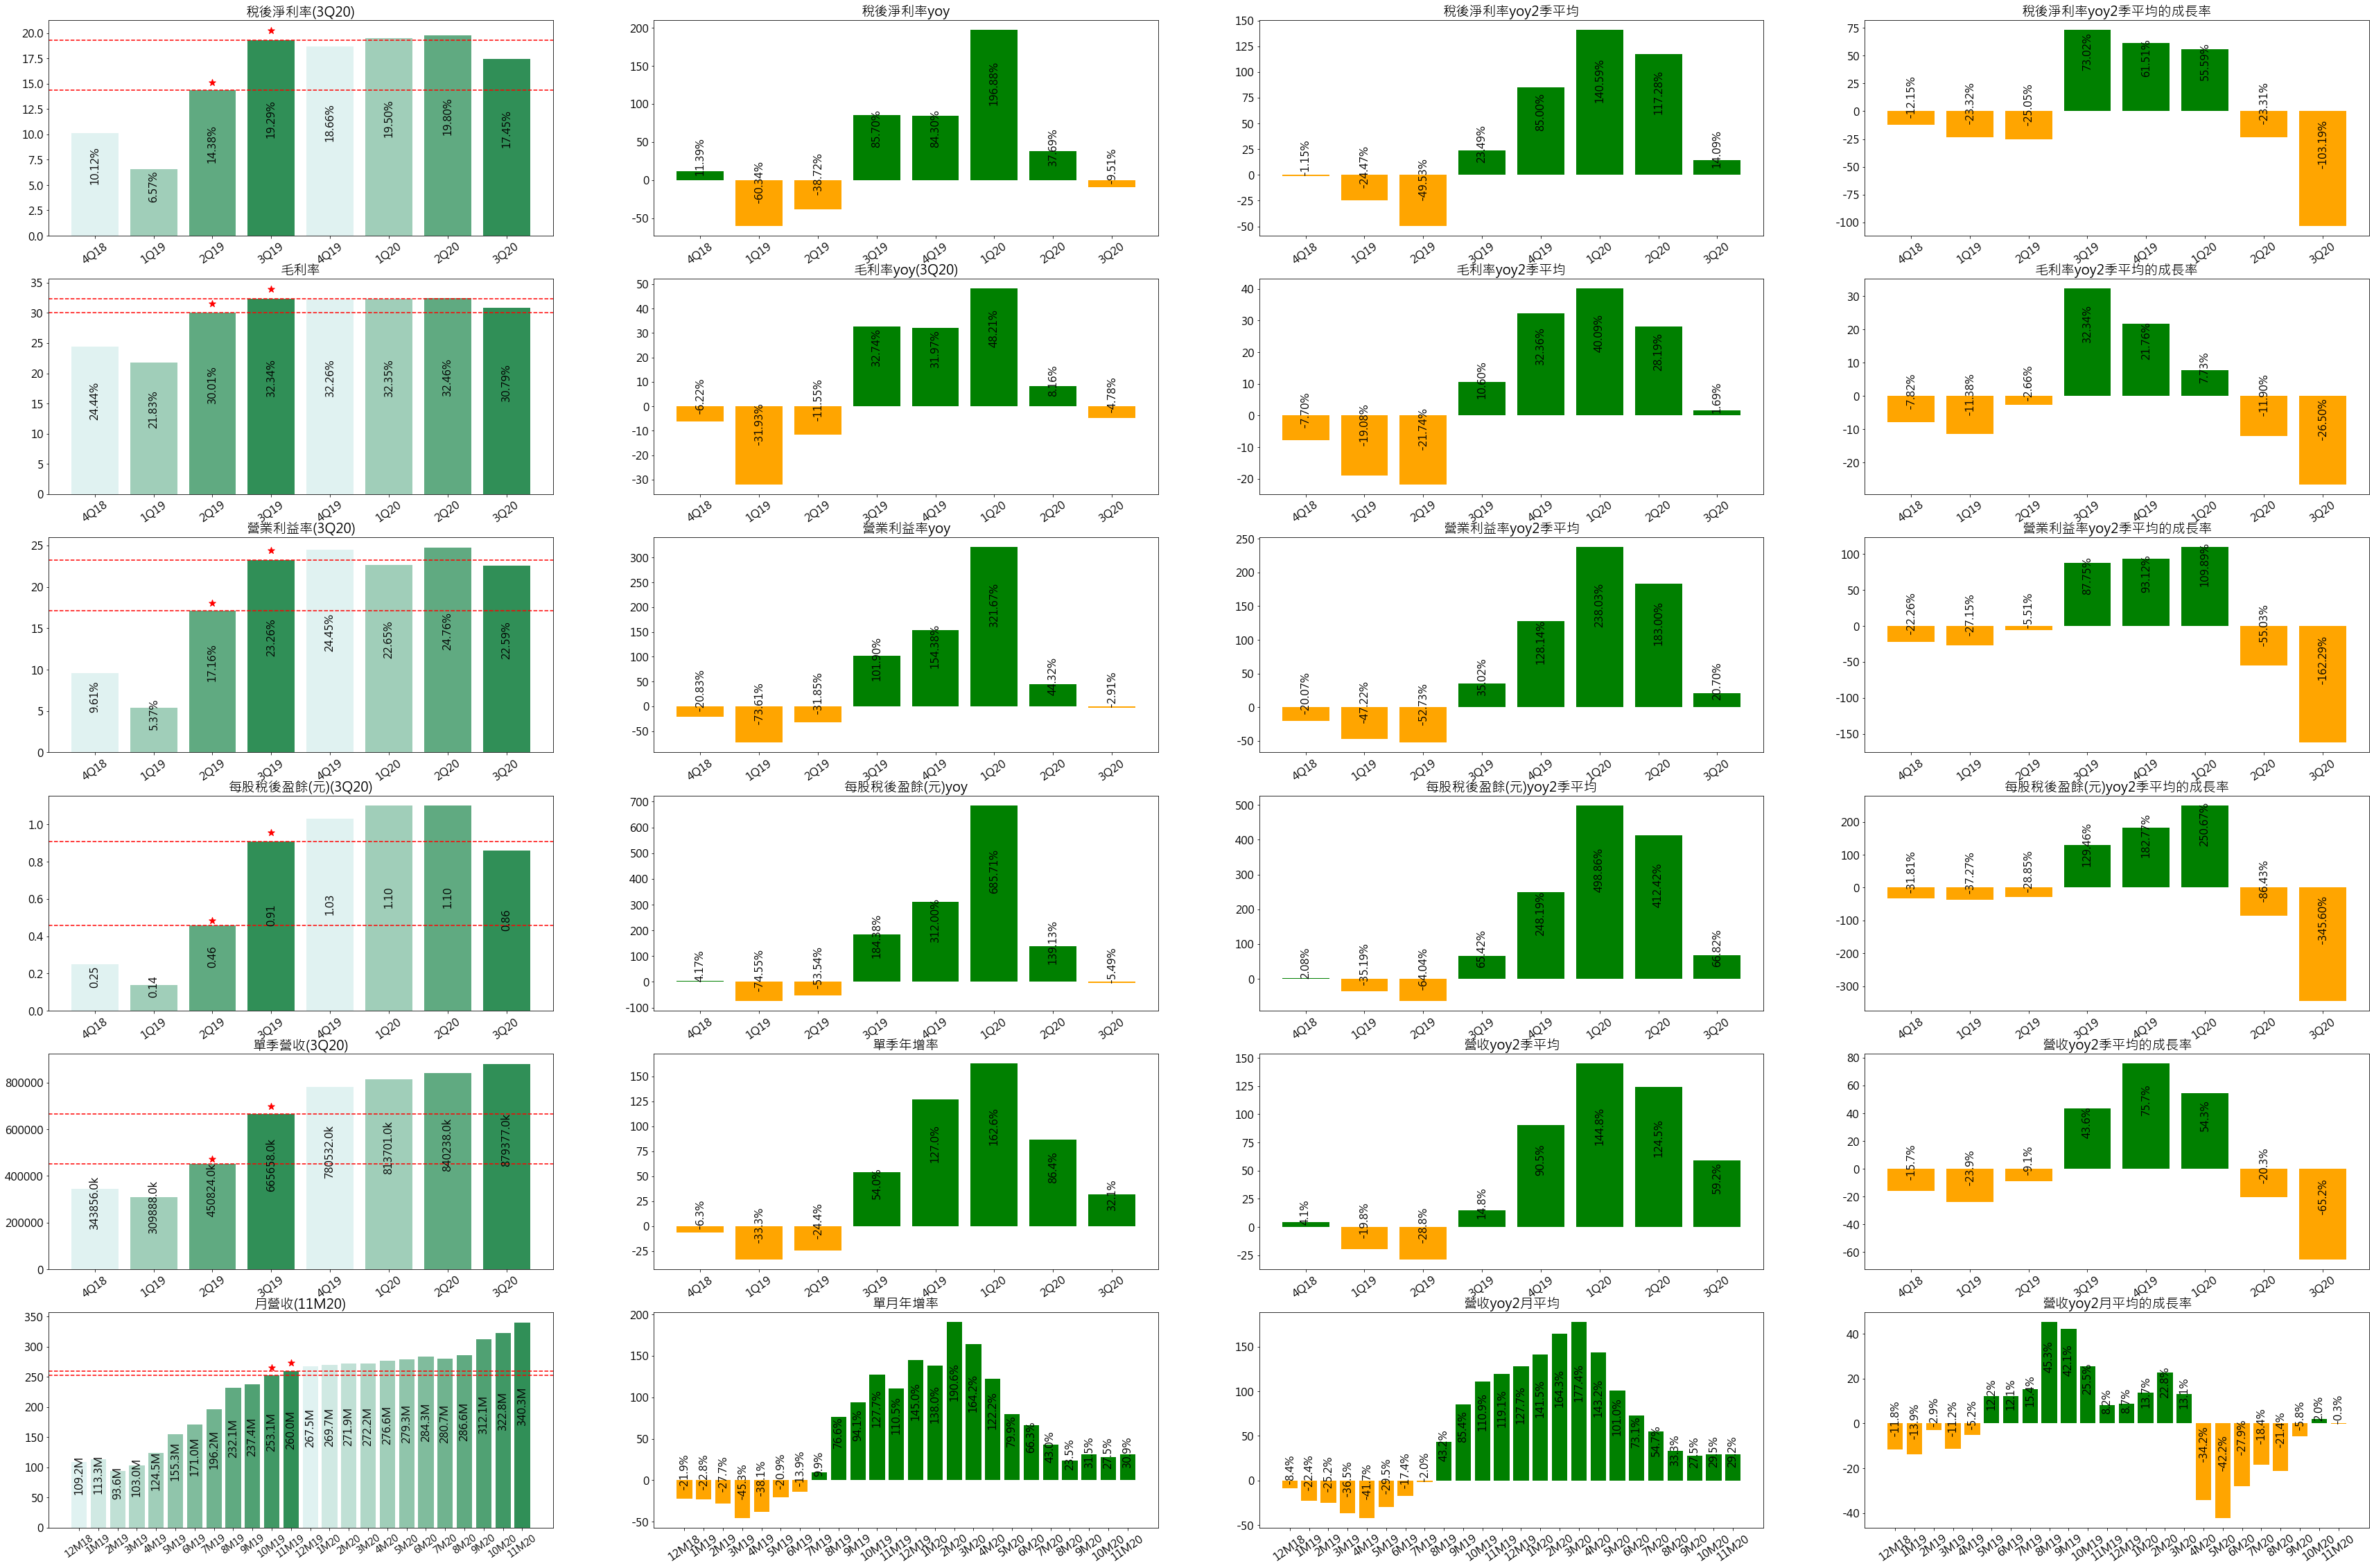

6533基本面分析
營收分數: 3
6533的分數(2020Q3 | 2020M11): 3/15


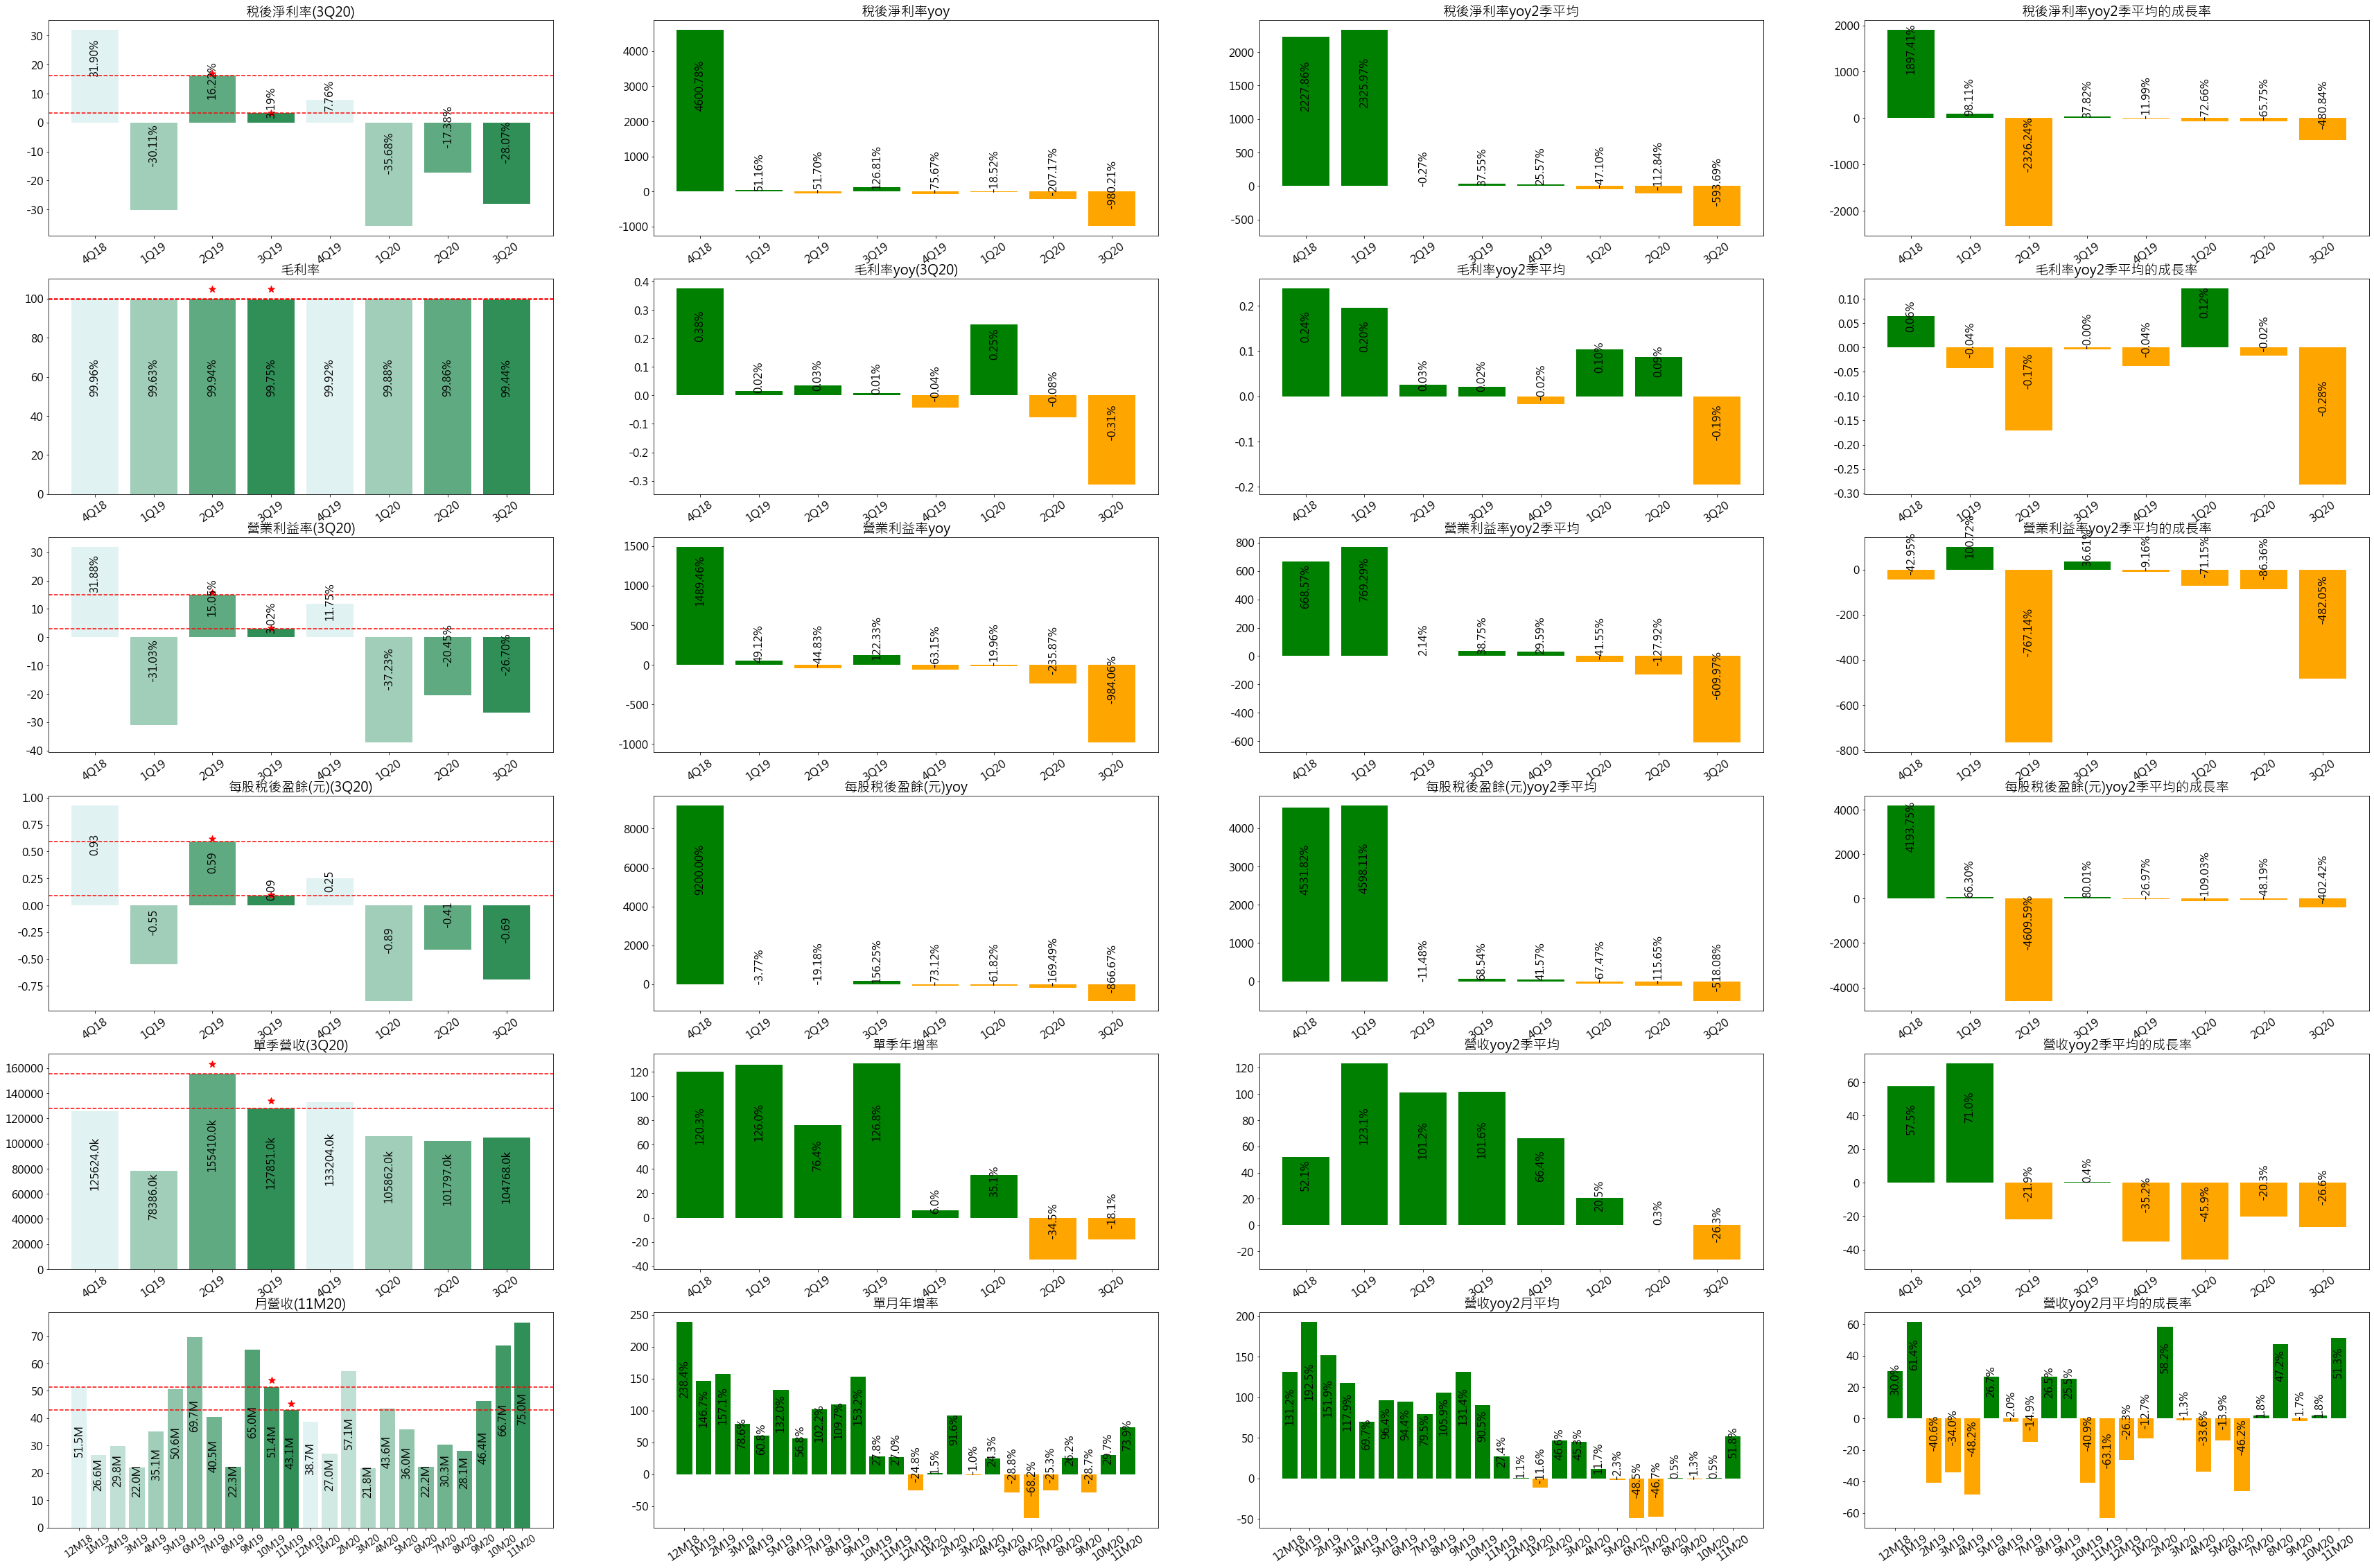

6477基本面分析
營收分數: 1
6477的分數(2020Q3 | 2020M11): 6/15


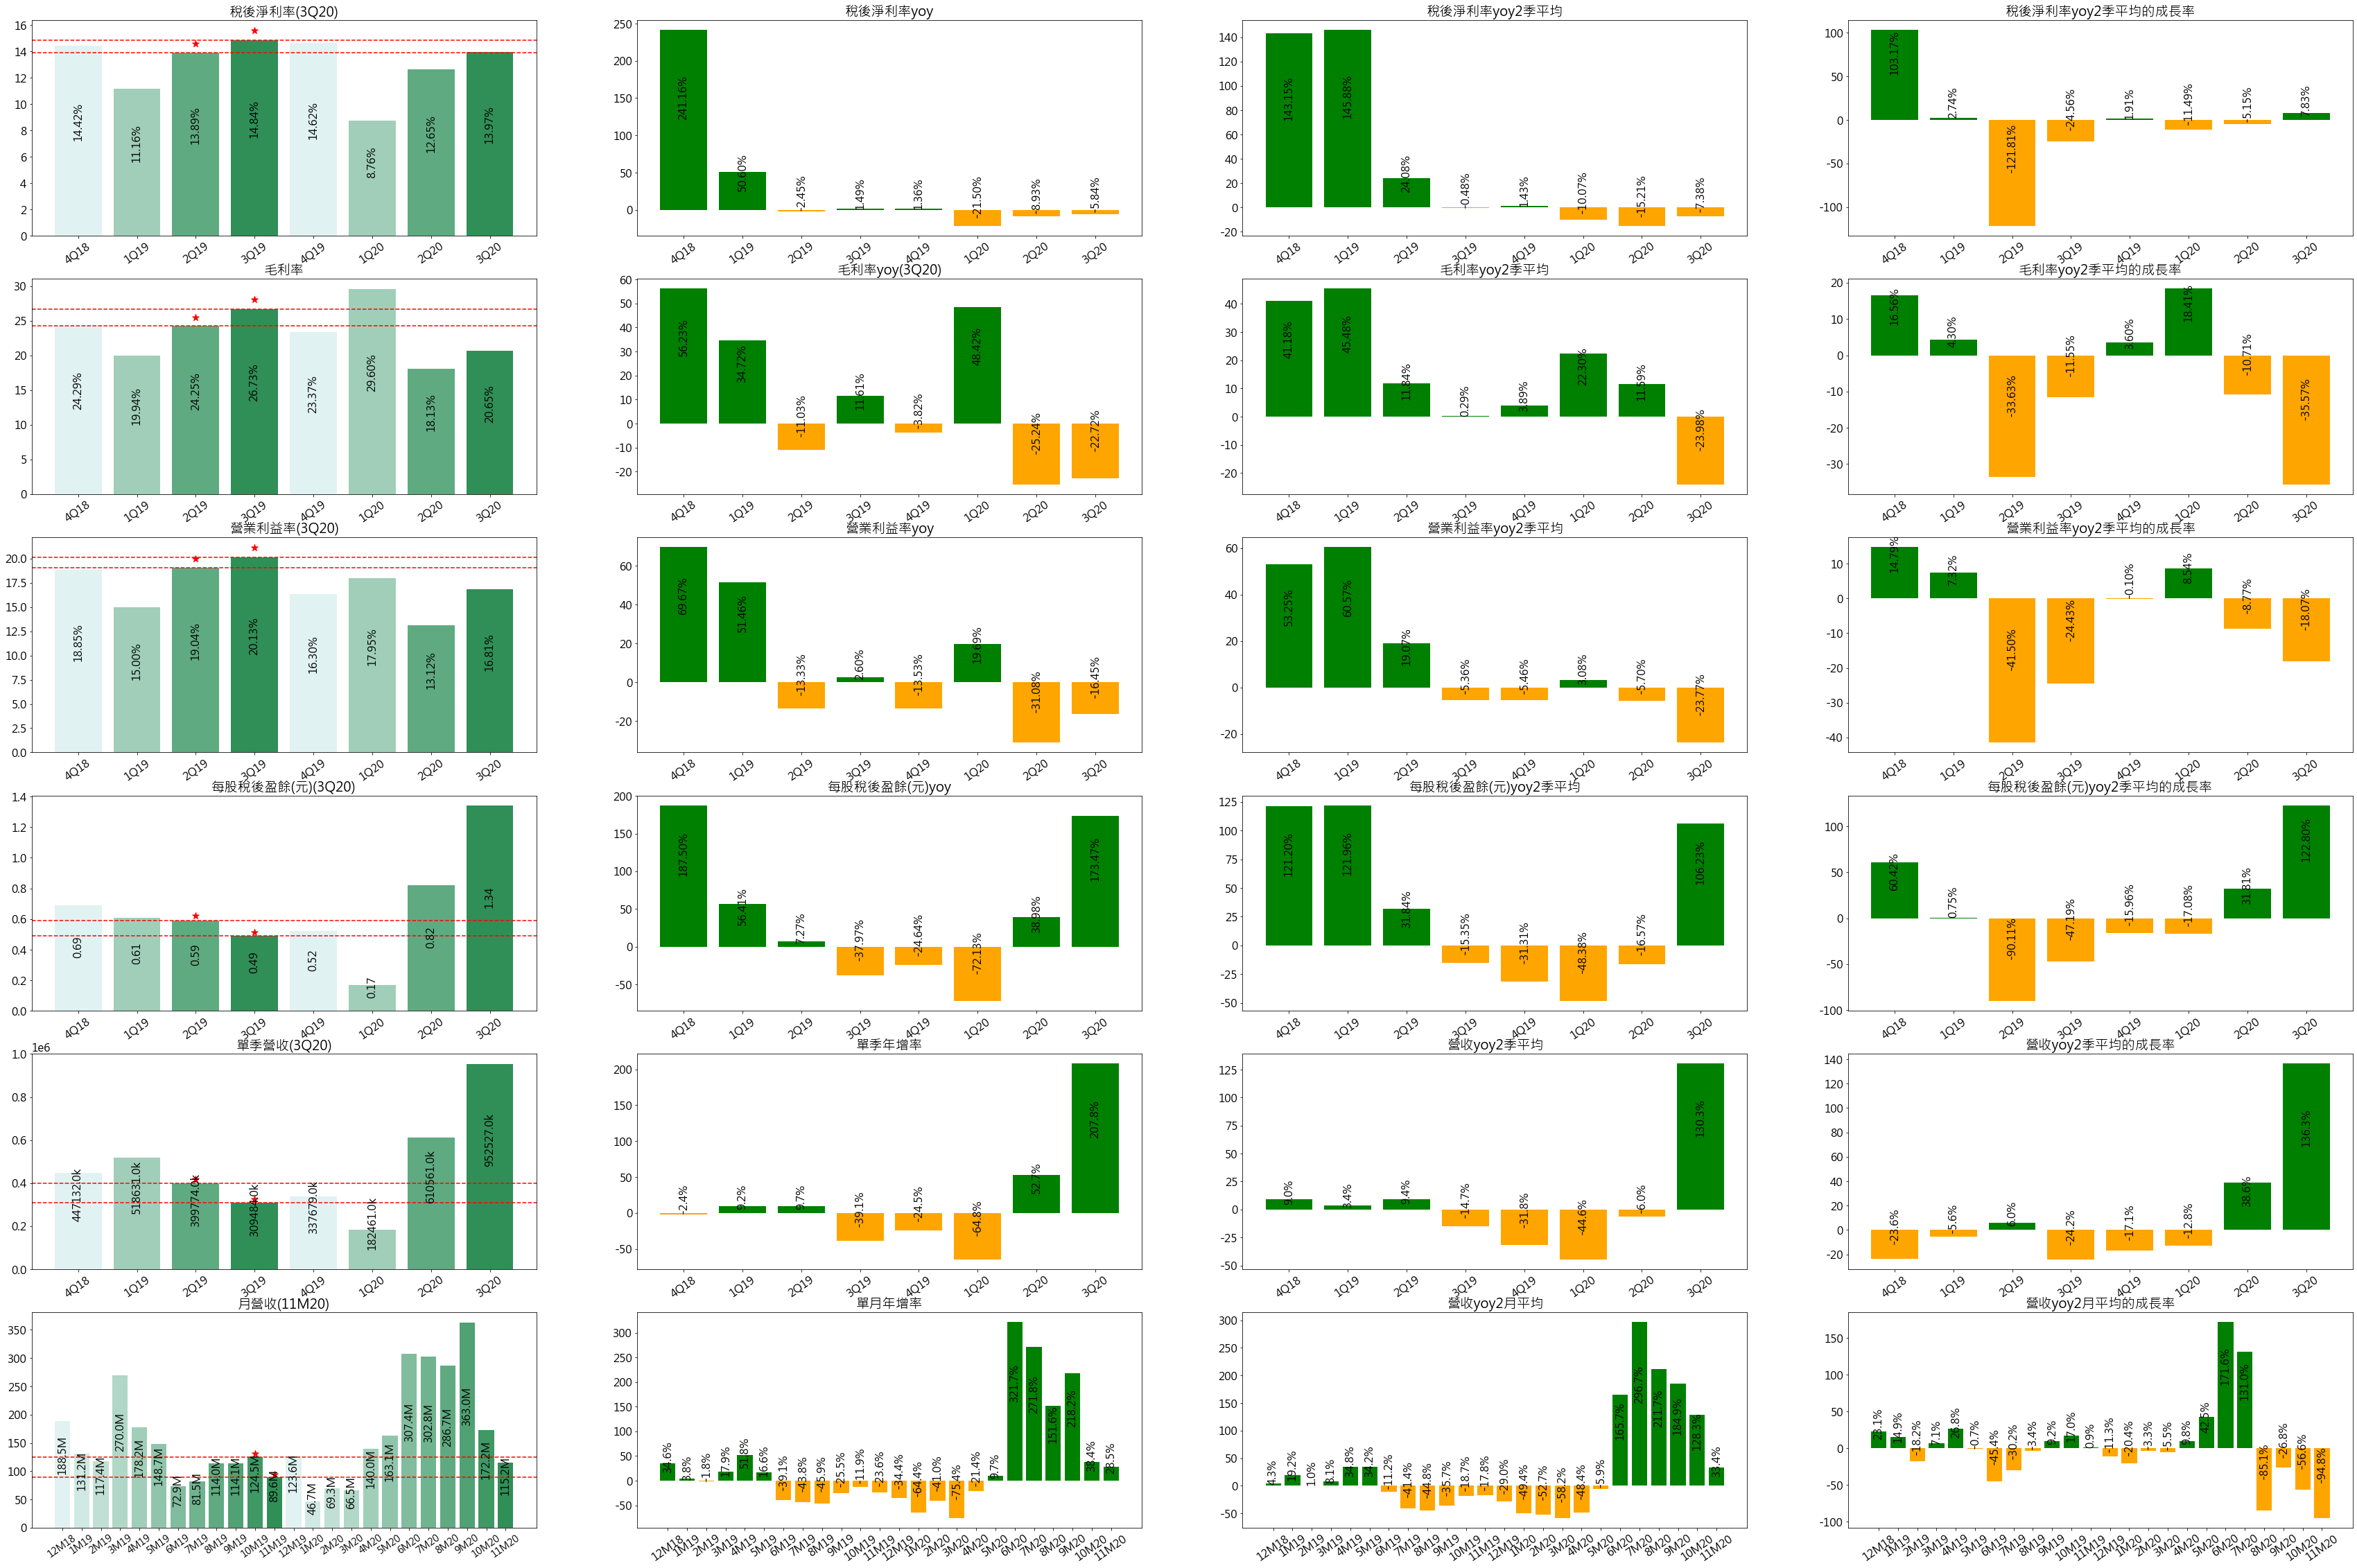

2481基本面分析
營收分數: 1
2481的分數(2020Q3 | 2020M11): 15/15


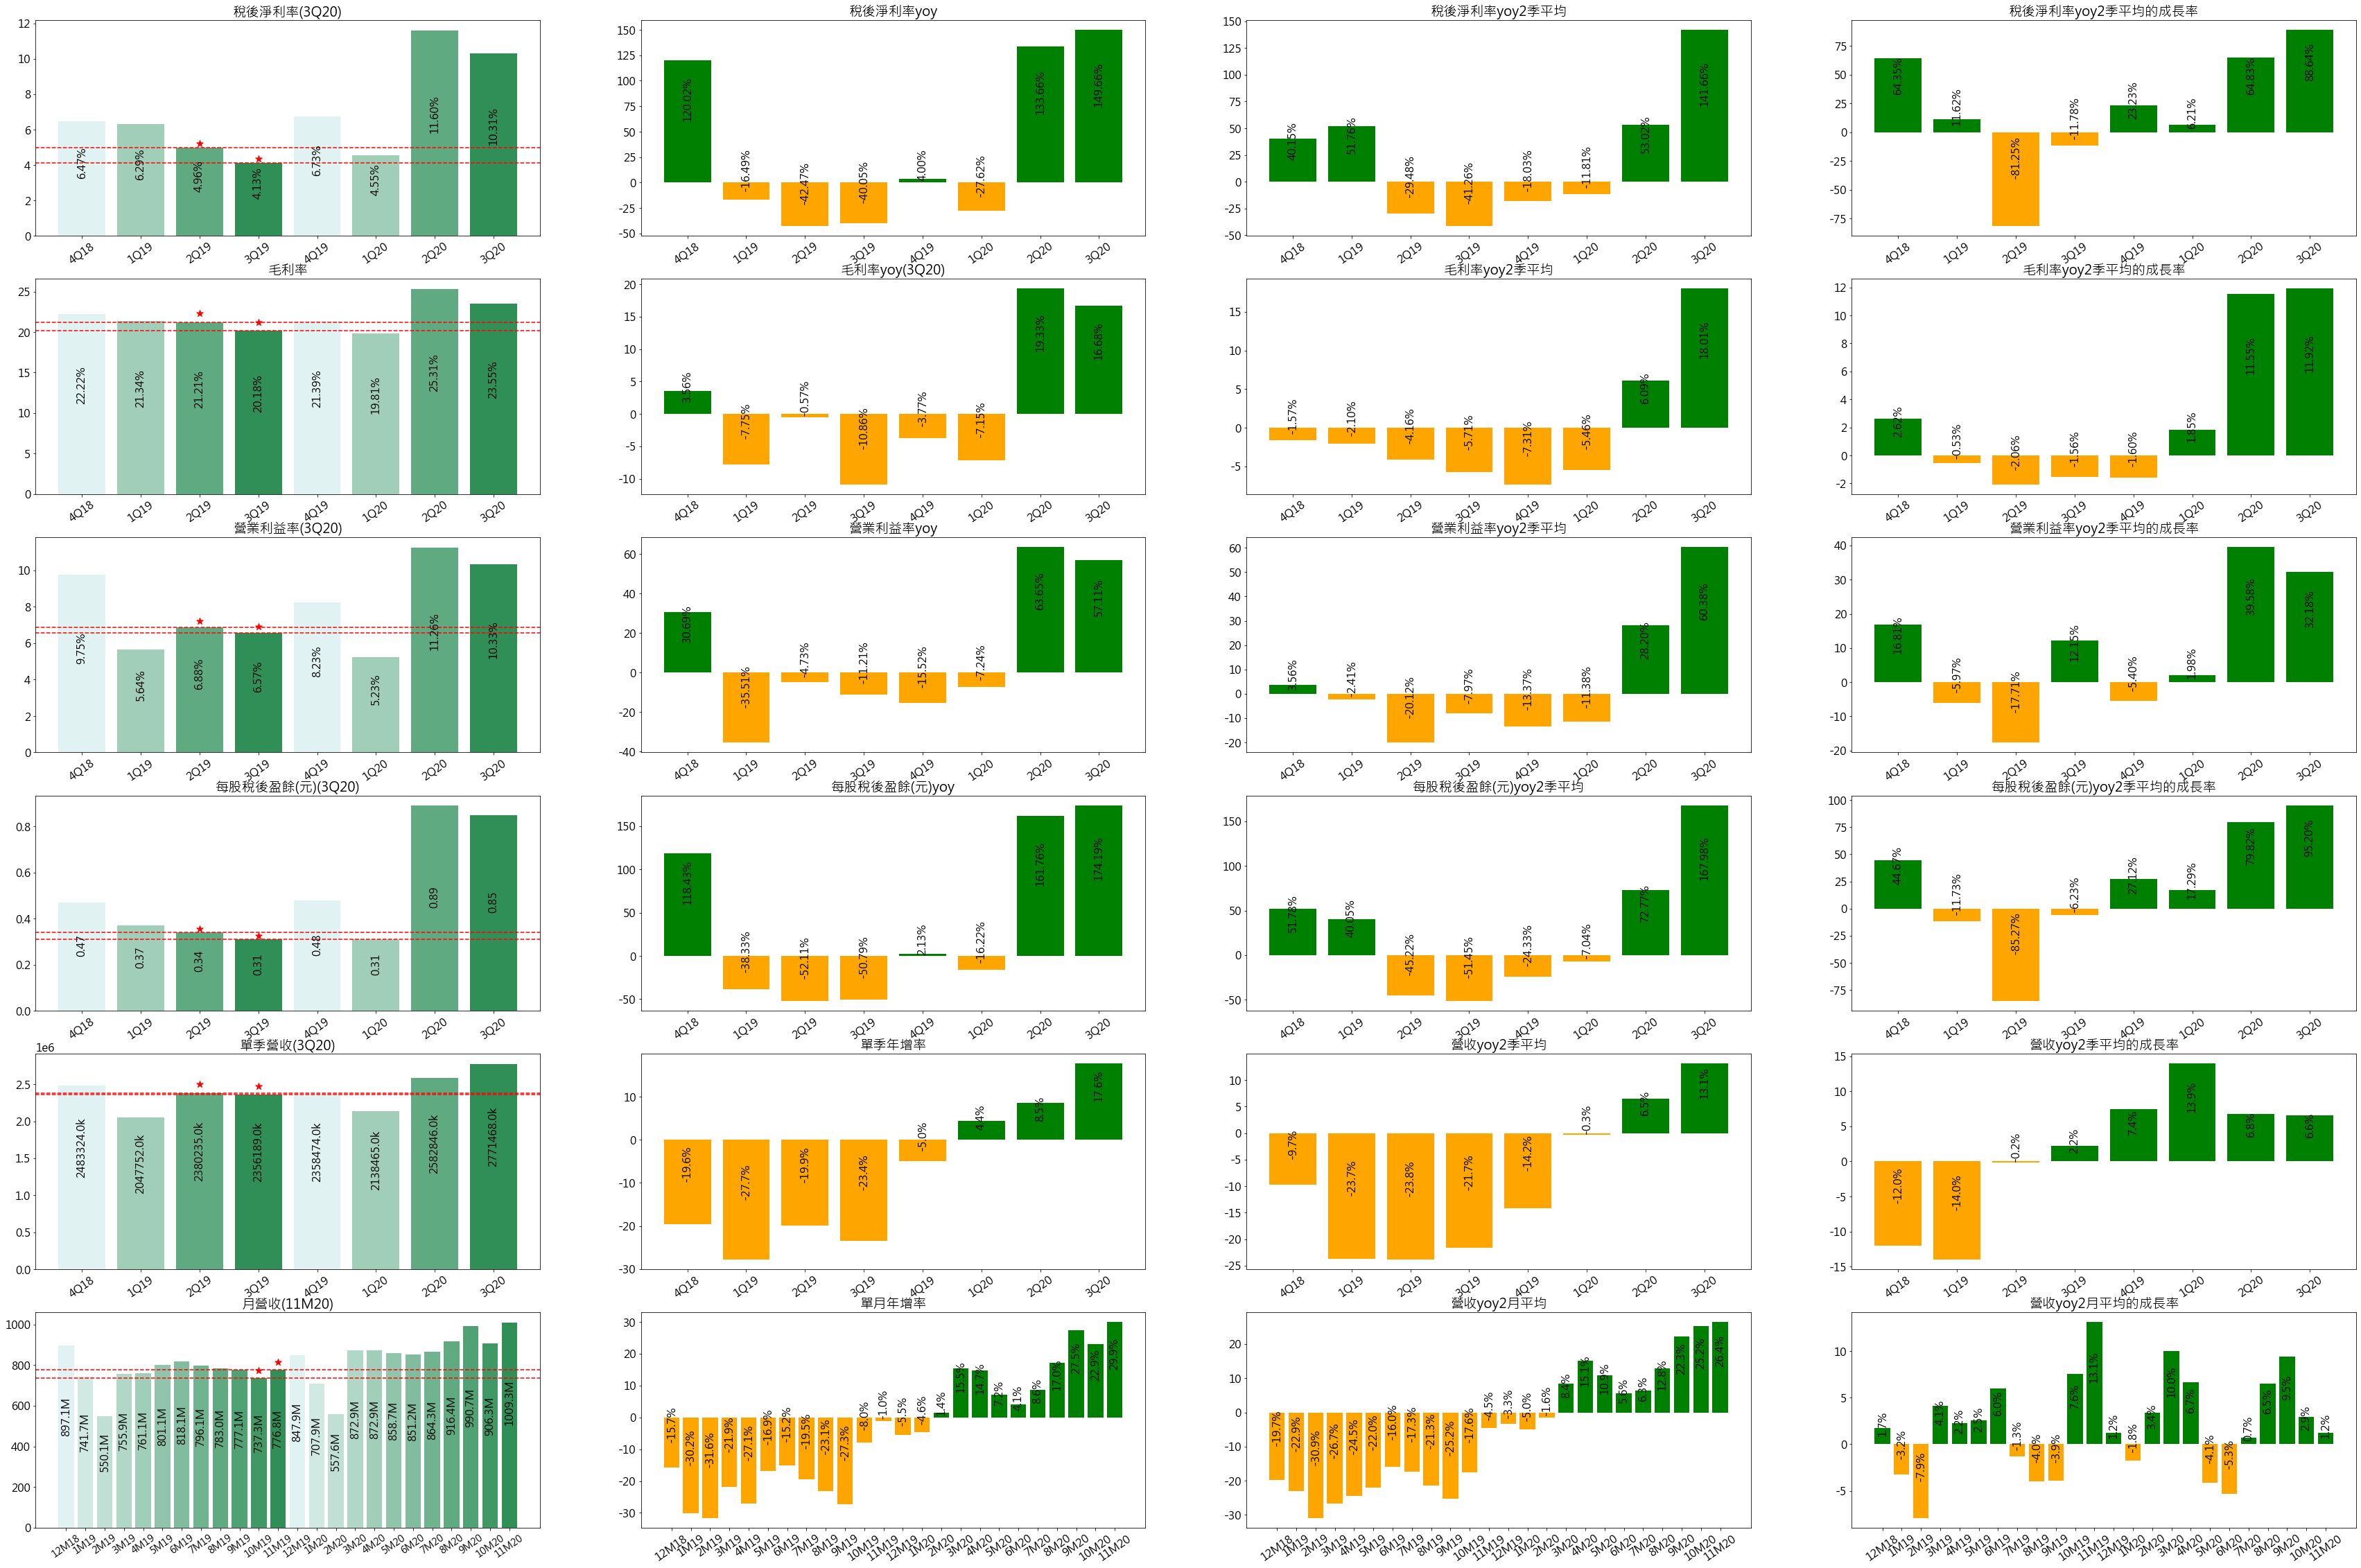

2454基本面分析
營收分數: 2
2454的分數(2020Q3 | 2020M11): 12/15


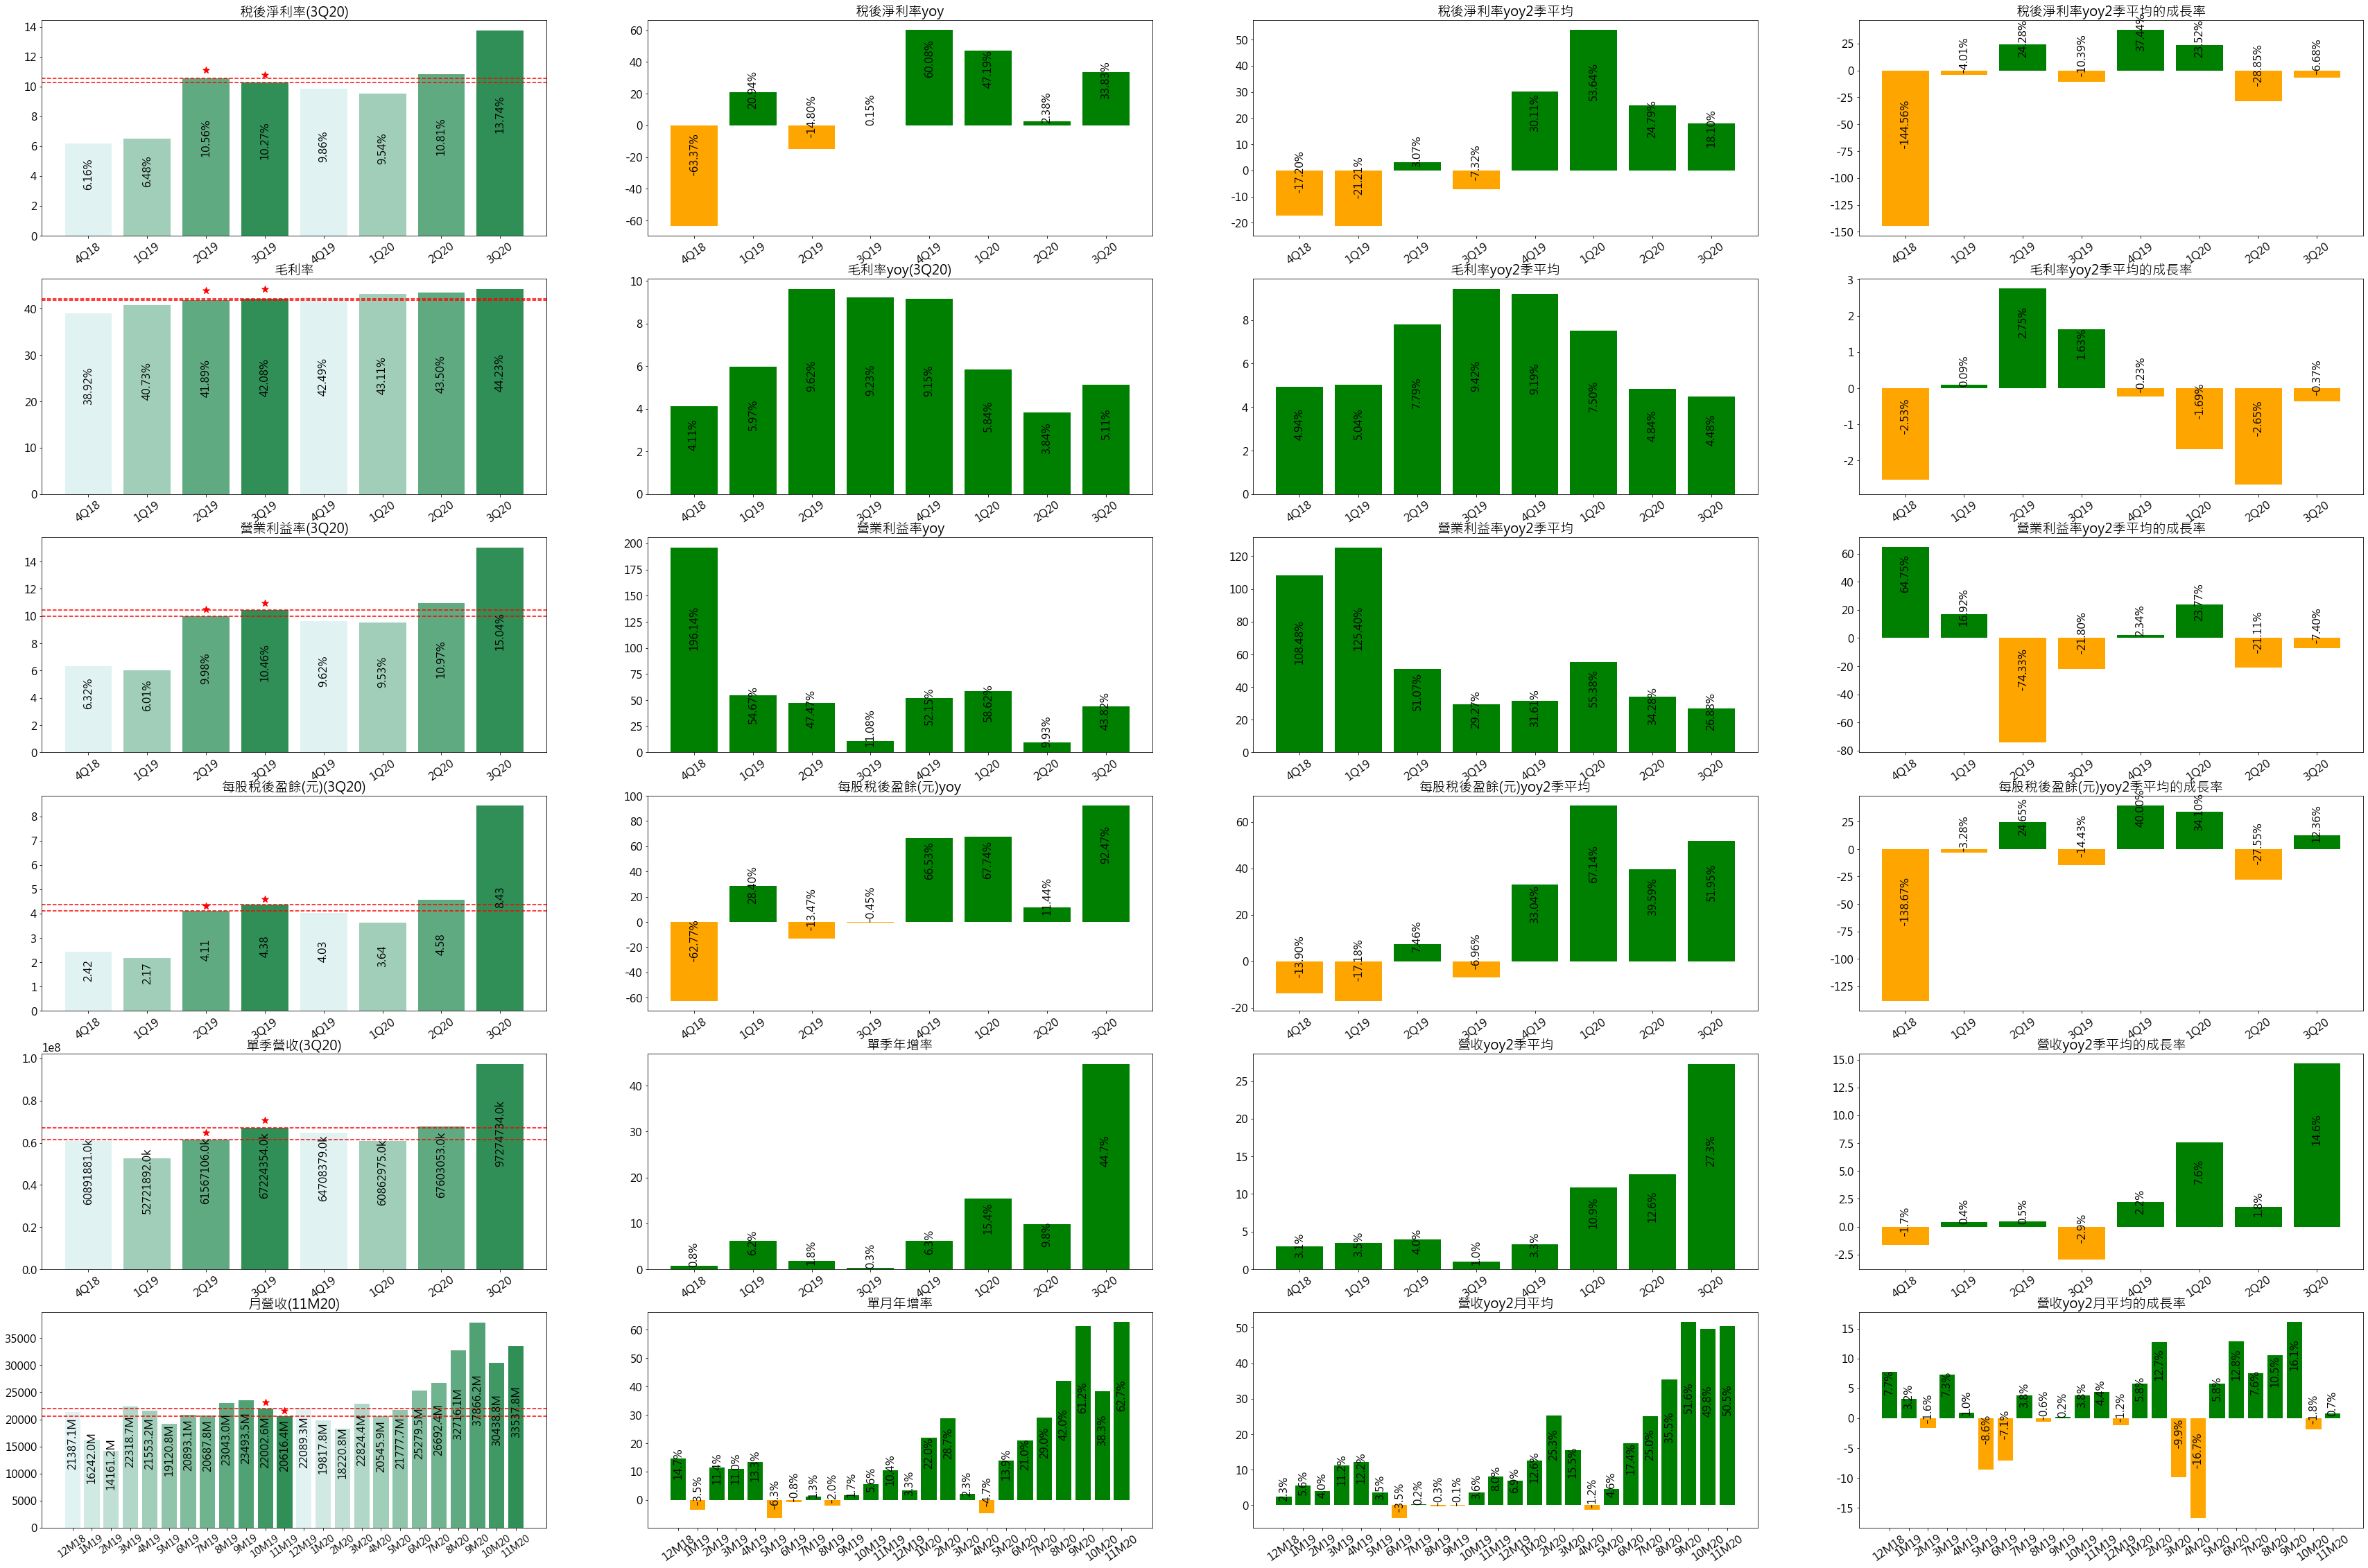

8086的分數(2020Q3 | 2020M11): 6/15 | 2
6533的分數(2020Q3 | 2020M11): 3/15 | 3
6477的分數(2020Q3 | 2020M11): 6/15 | 1
2481的分數(2020Q3 | 2020M11): 15/15 | 1
2454的分數(2020Q3 | 2020M11): 12/15 | 2


In [14]:
# choosen = '3605 6863 5536 2357 3294'.split(' ')
## 2 3 3 1 0
choosen = qualify_stock_list
score_list = []
Rev_score_list = []

print(initial_time, end_time)
for ID in choosen:
# for ID in ['8028']:
    figure_num = 6
    try:
        SF = StockFundamental(stockID=ID, financial_statement_df=financial_statement_df, monthly_revenue_df=monthly_revenue_df, initial_time = initial_time, end_time = end_time)
        plt.figure(figsize=(60, 40))
        print(f'{SF.stockID}基本面分析')
        Rev_score = SF.get_revenue_score()
        print(f'營收分數: {Rev_score}')
        SF.plot_quarterly_Post_TaxPR()
        SF.plot_quarterly_GPR()
        SF.plot_quarterly_OPR()
        SF.plot_quarterly_EPS()
        SF.plot_quarterly_revenue()
        SF.month_revenue()
        score_list.append(SF.get_score())
        Rev_score_list.append(Rev_score)
        plt.show()
    except Exception as e:
        print(f'{bcolors.FAIL}Failed to get the data of {ID}{bcolors.RESET}')
        print(e)
        continue
for score, R_score in zip(score_list, Rev_score_list):
    print(score, end=' | ')
    print(R_score)

In [15]:
text = ''
text += f'###T1\n'
text += f'###T2\n'
text += f'###0\n'
text += f'###新增\n'
for id in qualify_stock_list:
    # print(id)
    id = str(id)
    if allstock_info.loc[id, '市場別'] == '上櫃':
        text += f'TPEX:{id}\n'
    elif allstock_info.loc[id, '市場別'] == '上市':
        text += f'TWSE:{id}\n'
    # create and save to txt

print(len(qualify_stock_list))
with open(f'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/tradingview觀察清單/{D}_{name}.txt', 'w', encoding='utf-8') as f:
    f.write(text)
print(f'{D}_{name}.txt saved')

5
2020-12-15_CMR.txt saved


In [11]:
import numpy as np
position = 165000
close = input("close price : ")
close = float(close)
shares = position / close
print(f'close : {close}')
print(f'shares/0.05 position : {shares*0.05}')
for i in np.arange(0.05, 1, 0.05):
    print(round(i, 2), round(shares*i))

close : 14.2
shares/0.05 position : 580.9859154929578
0.05 581
0.1 1162
0.15 1743
0.2 2324
0.25 2905
0.3 3486
0.35 4067
0.4 4648
0.45 5229
0.5 5810
0.55 6391
0.6 6972
0.65 7553
0.7 8134
0.75 8715
0.8 9296
0.85 9877
0.9 10458
0.95 11039


In [ ]:
import numpy as np
position = 660000
close = input("close price : ")
close = float(close)
shares = position / close
print(f'close : {close}')
print(f'shares/0.05 position : {shares*0.05}')
for i in np.arange(0.05, 1, 0.05):
    print(round(i, 2), round(shares*i))

In [ ]:
# choosen = '3605 6863 5536 2357 3294'.split(' ')
## 2 3 3 1 0
choosen = '8086 6669 6558 6510 6451 6278 6269 4958 4943 3673 3653 3374'.split(' ')
score_list = []
Rev_score_list = []
end_time = D
start_fc = lambda x: f'{int(x.split("-")[0])-2}-{int(x.split("-")[1])}-{int(x.split("-")[2])}'
end_fc = lambda x: f'{int(x.split("-")[0])}-{int(x.split("-")[1])}-{int(x.split("-")[2])}'
end_time = end_fc(D)
initial_time = start_fc(D)
print(initial_time, end_time, len(choosen))
## 合格股票
qualify_stock_list = []
for ID in choosen:
    figure_num = 6
    try:
        SF = StockFundamental(stockID=ID, financial_statement_df=financial_statement_df, monthly_revenue_df=monthly_revenue_df, initial_time = initial_time, end_time = end_time)
        print(f'{SF.stockID}基本面分析')
        Rev_score = SF.get_revenue_score()
        print(f'營收分數: {Rev_score}')
        Rev_score_list.append((SF.stockID, Rev_score))
        if Rev_score > 0:
            qualify_stock_list.append(ID)
    except:
        print(f'{bcolors.FAIL}Failed to get the data of {ID}{bcolors.RESET}')
        continue
# for R_score in Rev_score_list:
    # print(R_score)



#### 基本面分數

In [69]:
for score, R_score in zip(score_list, Rev_score_list):
    print(score, end=' | ')
    print(R_score)

8234的分數(2024Q3 | 2025M1): 7/15 | 2
6763的分數(2024Q3 | 2025M1): 0/15 | 0
6446的分數(2024Q3 | 2025M1): 10/15 | 3
6290的分數(2024Q3 | 2025M1): 6/15 | 2
6139的分數(2024Q3 | 2025M1): 8/15 | 0
3558的分數(2024Q3 | 2025M1): 10/15 | 0
3264的分數(2024Q3 | 2025M1): 1/15 | 0
3162的分數(2024Q3 | 2025M1): 11/15 | 3
3019的分數(2024Q3 | 2025M1): 12/15 | 2
2395的分數(2024Q3 | 2025M1): 9/15 | 2
2049的分數(2024Q3 | 2025M1): 8/15 | 0
1815的分數(2024Q3 | 2025M1): 14/15 | 2


In [ ]:
choosen = '8234 6763 6446 6290 6139 3558 3264 3162 3019 2395 2049 1815'.split(' ')
## 2 3 3 1 0
# choosen = sort_ID
score_list = []
Rev_score_list = []
initial_time = '2023-03-31'
end_time = '2024-12-28'
initial_time = pd.to_datetime(initial_time)
end_time = pd.to_datetime(end_time)
for ID in choosen:
    figure_num = 6
    try:
        SF = StockFundamental(stockID=ID, financial_statement_df=financial_statement_df, monthly_revenue_df=monthly_revenue_df, initial_time = initial_time, end_time = end_time)
        plt.figure(figsize=(60, 40))
        print(f'{SF.stockID}基本面分析')
        Rev_score = SF.get_revenue_score()
        print(f'營收分數: {Rev_score}')
        SF.plot_quarterly_Post_TaxPR()
        SF.plot_quarterly_GPR()
        SF.plot_quarterly_OPR()
        SF.plot_quarterly_EPS()
        SF.plot_quarterly_revenue()
        SF.month_revenue()
        score_list.append(SF.get_score())
        Rev_score_list.append(Rev_score)
        plt.show()
    except Exception as e:
        print(f'{bcolors.FAIL}Failed to get the data of {ID}{bcolors.RESET}')
        print(e)
        continue
for score, R_score in zip(score_list, Rev_score_list):
    print(score, end=' | ')
    print(R_score)

In [ ]:
import numpy as np
position = 660000
close = input("close price : ")
close = float(close)
shares = position / close
print(f'close : {close}')
print(f'shares/0.05 position : {shares*0.05}')
for i in np.arange(0.05, 1, 0.05):
    print(round(i, 2), round(shares*i))

### 回測交易結果分析

In [5]:
import pandas as pd
import numpy as np

df = pd.read_excel(r'C:\Users\User\Desktop\投資檢討\回測\RE策略\交易.XLSX', header=0)
df.head()

,股票名稱,型態,營收,財報,分數,買法,倉位,倉位號碼,檢討,出場依據,...,倉位%,倉位大小,投資成本,目前持倉,損益,股數,平均買價,平均賣價,停損%,盈虧比
0,8046,4,2,14,8.000000,PPB,0.15+0.25+0.3,4.0,NaN,停利,...,0.23310,0.70,462000.0,NaN,56862,NaN,NaN,NaN,3,4.102597
1,8016,5,2,10,6.666667,PPBB,0.15+0.1+0.3+0.2,7.0,NaN,停利,...,0.21645,0.65,429000.0,NaN,34369,NaN,NaN,NaN,3,2.670474
2,6669,9,2,10,6.666667,P+B,0.2+0.25,8.0,NaN,停利+大盤,...,0.14985,0.45,297000.0,NaN,26167,NaN,NaN,NaN,3,2.936813
3,3680,9,1,12,5.666667,P,0.2,9.0,NaN,停利,...,0.06660,0.20,132000.0,NaN,14791,NaN,NaN,NaN,3,3.735101
4,2492,3,2,10,6.666667,B+B,0.1+0.1,2.0,NaN,停損,...,0.06660,0.20,132000.0,NaN,-6328,NaN,NaN,NaN,3,-1.597980


In [14]:
GB_style = df.groupby('財報')

In [15]:
GB_style.count()

,股票名稱,型態,營收,分數,買法,倉位,倉位號碼,檢討,出場依據,損益%,...,倉位%,倉位大小,投資成本,目前持倉,損益,股數,平均買價,平均賣價,停損%,盈虧比
財報,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,0,1,2,2,...,2,2,2,0,2,0,0,0,2,2
4,2,2,2,2,2,2,0,2,2,2,...,2,2,2,0,2,0,0,0,2,2
5,4,4,4,4,4,4,0,3,4,4,...,4,4,4,0,4,0,0,0,4,4
6,5,5,5,5,5,5,1,3,5,5,...,5,5,5,0,5,0,0,0,5,5
7,3,3,3,3,3,3,1,1,3,3,...,3,3,3,0,3,0,0,0,3,3
8,3,3,3,3,3,3,2,0,3,3,...,3,3,3,0,3,0,0,0,3,3
9,3,3,3,3,3,3,2,1,3,3,...,3,3,3,0,3,0,0,0,3,3
10,8,8,8,8,8,8,5,1,8,8,...,8,8,8,0,8,0,0,0,8,8
11,9,9,9,9,9,9,4,3,9,9,...,9,9,9,0,9,0,0,0,9,9


In [16]:
GB_style_mean = GB_style.mean()
GB_style_mean = GB_style_mean.sort_values(by='損益%', ascending=False)
GB_style_mean

,股票名稱,型態,營收,分數,倉位號碼,損益%,持有時間,倉位%,倉位大小,投資成本,目前持倉,損益,股數,平均買價,平均賣價,停損%,盈虧比
財報,,,,,,,,,,,,,,,,,
14,3778.875000,4.875000,1.625000,7.375000,4.0,3.467560,9.500000,0.143606,0.431250,284625.0,NaN,15410.000000,NaN,NaN,NaN,3.0,1.155853
7,4707.333333,3.666667,2.333333,6.222222,9.0,2.094124,13.000000,0.111000,0.333333,220000.0,NaN,6585.333333,NaN,NaN,NaN,3.0,0.698041
3,2851.500000,2.500000,2.500000,5.166667,NaN,0.449478,14.500000,0.158175,0.475000,313500.0,NaN,1481.000000,NaN,NaN,NaN,3.0,0.149826
10,5889.750000,5.375000,2.000000,6.666667,6.4,-0.066131,6.500000,0.124875,0.375000,247500.0,NaN,2709.250000,NaN,NaN,NaN,3.0,-0.022044
8,5125.333333,2.333333,2.000000,6.000000,4.5,-0.512256,5.666667,0.116550,0.350000,231000.0,NaN,1123.666667,NaN,NaN,NaN,3.0,-0.170752
4,4609.500000,2.500000,2.500000,5.500000,NaN,-0.699495,3.500000,0.099900,0.300000,198000.0,NaN,-818.500000,NaN,NaN,NaN,3.0,-0.233165
12,4856.800000,6.300000,2.400000,8.000000,7.6,-0.831638,3.900000,0.103230,0.310000,204600.0,NaN,-3257.900000,NaN,NaN,NaN,3.0,-0.277213
9,5078.000000,7.000000,3.000000,8.000000,9.0,-1.085185,8.666667,0.094350,0.283333,187000.0,NaN,2521.333333,NaN,NaN,NaN,3.0,-0.361728
6,4935.800000,2.000000,2.600000,6.333333,7.0,-1.103320,5.000000,0.113220,0.340000,224400.0,NaN,-1915.200000,NaN,NaN,NaN,3.0,-0.367773
